#         The World Bank EdStats Data Analysis

### __OBJECTIVE:__ To find the countries that have a strong potential of customers for our services

In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Data

In [41]:
data = pd.read_csv('EdStatsData.csv')
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
data.shape

(886930, 70)

__Checking indicarotr__

In [128]:
data.groupby('Indicator Name').count()

,Country Name,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
Indicator Name,,,,,,,,,,,,,,,,,,,,,
"Adjusted net enrolment rate, lower secondary, both sexes (%)",242,242,242,4,29,29,25,29,22,27,...,0,0,0,0,0,0,0,0,0,0
"Adjusted net enrolment rate, lower secondary, female (%)",242,242,242,2,24,25,22,24,20,22,...,0,0,0,0,0,0,0,0,0,0
"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",242,242,242,2,24,24,22,24,20,22,...,0,0,0,0,0,0,0,0,0,0
"Adjusted net enrolment rate, lower secondary, male (%)",242,242,242,2,24,24,22,24,20,22,...,0,0,0,0,0,0,0,0,0,0
"Adjusted net enrolment rate, primary, both sexes (%)",242,242,242,15,15,17,18,19,21,22,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Youth illiterate population, 15-24 years, male (number)",242,242,242,3,0,0,0,0,5,8,...,0,0,0,0,0,0,0,0,0,0
"Youth literacy rate, population 15-24 years, both sexes (%)",242,242,242,3,0,0,0,0,5,8,...,0,0,0,0,0,0,0,0,0,0
"Youth literacy rate, population 15-24 years, female (%)",242,242,242,3,0,0,0,0,5,8,...,0,0,0,0,0,0,0,0,0,0


In [130]:
data.groupby('Indicator Name').count().shape

(3665, 69)

## Reading country data

In [43]:
data_country= pd.read_csv('EdStatsCountry.csv')
data_country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [131]:
data_country.shape

(241, 32)

In [133]:
data_country.duplicated(subset=['Country Code']).sum()

0

In [44]:
data_country.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

__Create a DF with contry_code, name, region and income_group__

In [45]:

countries_income = pd.DataFrame(data_country, columns =['Country Code','Short Name','Region','Income Group'])

countries_income

,Country Code,Short Name,Region,Income Group
0,ABW,Aruba,Latin America & Caribbean,High income: nonOECD
1,AFG,Afghanistan,South Asia,Low income
2,AGO,Angola,Sub-Saharan Africa,Upper middle income
3,ALB,Albania,Europe & Central Asia,Upper middle income
4,AND,Andorra,Europe & Central Asia,High income: nonOECD
...,...,...,...,...
236,XKX,Kosovo,Europe & Central Asia,Lower middle income
237,YEM,Yemen,Middle East & North Africa,Lower middle income
238,ZAF,South Africa,Sub-Saharan Africa,Upper middle income
239,ZMB,Zambia,Sub-Saharan Africa,Lower middle income


__Making a new DataFrame__

In [46]:

countries_income = pd.DataFrame({"Country_Code" : data_country["Country Code"].unique(), 
                                 "Name" : data_country["Short Name"], 
                                 "Region" : data_country["Region"], 
                                 "Income_group" : data_country["Income Group"]})

countries_income

,Country_Code,Name,Region,Income_group
0,ABW,Aruba,Latin America & Caribbean,High income: nonOECD
1,AFG,Afghanistan,South Asia,Low income
2,AGO,Angola,Sub-Saharan Africa,Upper middle income
3,ALB,Albania,Europe & Central Asia,Upper middle income
4,AND,Andorra,Europe & Central Asia,High income: nonOECD
...,...,...,...,...
236,XKX,Kosovo,Europe & Central Asia,Lower middle income
237,YEM,Yemen,Middle East & North Africa,Lower middle income
238,ZAF,South Africa,Sub-Saharan Africa,Upper middle income
239,ZMB,Zambia,Sub-Saharan Africa,Lower middle income


__Adding 2 data frames (data plus countries_income)__

In [47]:
data_p_country = pd.merge(data,countries_income, left_on='Country Code', right_on='Country_Code')
data_p_country.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2080,2085,2090,2095,2100,Unnamed: 69,Country_Code,Name,Region,Income_group
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ARB,Arab World,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ARB,Arab World,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ARB,Arab World,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ARB,Arab World,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,ARB,Arab World,NaN,NaN


__Select interesting features__

Reduce the columns from data_p_country

In [48]:
data_p_country.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69', 'Country_Code', 'Name', 'Region',
       'Income_group'],
      dtype='object')

__Keeping the years from 2000 to 2020__

In [49]:
data_c_reduced = data_p_country.filter(items=['Region', 'Country Name', 'Country Code', 'Income_group', 
                                                      'Indicator Name', 'Indicator Code','2000', '2001', '2002', '2003', '2004', '2005','2006',
                                              '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
                                              '2015', '2016', '2017', '2020'])
data_c_reduced.head()

,Region,Country Name,Country Code,Income_group,Indicator Name,Indicator Code,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
0,NaN,Arab World,ARB,NaN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Arab World,ARB,NaN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Arab World,ARB,NaN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Arab World,ARB,NaN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Arab World,ARB,NaN,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,77.245682,78.800522,80.051399,80.805389,...,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN


__Remove data with no value in Income_group__

In [50]:
data_c_reduced = data_c_reduced[data_c_reduced.Income_group.notnull()]
data_c_reduced.head()

,Region,Country Name,Country Code,Income_group,Indicator Name,Indicator Code,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
91625,South Asia,Afghanistan,AFG,Low income,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,47.436790,50.627232,NaN,NaN,NaN,NaN
91626,South Asia,Afghanistan,AFG,Low income,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,34.073261,37.641541,NaN,NaN,NaN,NaN
91627,South Asia,Afghanistan,AFG,Low income,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.567060,0.598370,NaN,NaN,NaN,NaN
91628,South Asia,Afghanistan,AFG,Low income,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,60.087059,62.906952,NaN,NaN,NaN,NaN
91629,South Asia,Afghanistan,AFG,Low income,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Select Countries with __Upper middle income__ and __High income__

In [51]:
data_c_reduced.Income_group.unique()

array(['Low income', 'Upper middle income', 'High income: nonOECD',
       'Lower middle income', 'High income: OECD'], dtype=object)

In [52]:
incomes_to_keep = ['Upper middle income', 'High income: nonOECD', 'High income: OECD']
data_r_income = data_c_reduced[data_c_reduced.Income_group.isin(incomes_to_keep)]
data_r_income.head()

,Region,Country Name,Country Code,Income_group,Indicator Name,Indicator Code,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
95290,Europe & Central Asia,Albania,ALB,Upper middle income,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,84.558281,85.306610,NaN,NaN,...,NaN,NaN,NaN,NaN,87.666588,88.778252,NaN,NaN,NaN,NaN
95291,Europe & Central Asia,Albania,ALB,Upper middle income,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,83.848213,84.769829,NaN,NaN,...,NaN,NaN,NaN,NaN,87.354607,88.133423,NaN,NaN,NaN,NaN
95292,Europe & Central Asia,Albania,ALB,Upper middle income,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,0.983600,0.987710,NaN,NaN,...,NaN,NaN,NaN,NaN,0.993110,0.986010,NaN,NaN,NaN,NaN
95293,Europe & Central Asia,Albania,ALB,Upper middle income,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,85.246353,85.824432,NaN,NaN,...,NaN,NaN,NaN,NaN,87.960289,89.383621,NaN,NaN,NaN,NaN
95294,Europe & Central Asia,Albania,ALB,Upper middle income,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,95.889877,94.327347,NaN,91.710312,...,89.393333,91.033867,93.225662,96.137093,95.912598,95.920891,NaN,NaN,NaN,NaN


In [53]:
data_r_income.groupby('Indicator Name').count()

,Region,Country Name,Country Code,Income_group,Indicator Code,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Indicator Name,,,,,,,,,,,,,,,,,,,,,
"Adjusted net enrolment rate, lower secondary, both sexes (%)",130,130,130,130,130,61,61,64,62,65,...,69,68,69,64,63,52,1,0,0,0
"Adjusted net enrolment rate, lower secondary, female (%)",130,130,130,130,130,60,57,61,59,62,...,68,66,68,63,62,51,1,0,0,0
"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",130,130,130,130,130,60,57,61,59,62,...,68,66,68,63,62,51,1,0,0,0
"Adjusted net enrolment rate, lower secondary, male (%)",130,130,130,130,130,60,57,61,59,62,...,68,66,68,63,62,51,1,0,0,0
"Adjusted net enrolment rate, primary, both sexes (%)",130,130,130,130,130,75,71,75,74,76,...,82,78,81,83,79,78,67,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Youth illiterate population, 15-24 years, male (number)",130,130,130,130,130,17,15,9,4,10,...,16,27,38,20,18,18,18,10,0,0
"Youth literacy rate, population 15-24 years, both sexes (%)",130,130,130,130,130,17,15,9,4,10,...,16,27,38,20,18,18,19,10,0,0
"Youth literacy rate, population 15-24 years, female (%)",130,130,130,130,130,17,15,9,4,10,...,16,27,38,20,18,18,19,10,0,0


### Selecte useful Indicators from "Indicator Code" feature

## INTERNET

<span style='background :yellow' > </span>


- Internet users (per 100 people)(IT.NET.USER.P2)
- Personal computers (per 100 people)(IT.CMP.PCMP.P2)

__Countries with the Internet access and a personal computer__

In [165]:
data_r_internet = data_r_income.loc[(data_r_income['Indicator Code'] == "IT.NET.USER.P2")|
                                                (data_r_income['Indicator Code'] == "IT.CMP.PCMP.P2")] 
data_r_internet.head()

,Region,Country Name,Country Code,Income_group,Indicator Name,Indicator Code,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
96665,Europe & Central Asia,Albania,ALB,Upper middle income,Internet users (per 100 people),IT.NET.USER.P2,0.114097,0.325798,0.390081,0.971900,...,41.20,45.0,49.0,54.655959,57.2,60.1,63.252933,66.363445,NaN,NaN
97374,Europe & Central Asia,Albania,ALB,Upper middle income,Personal computers (per 100 people),IT.CMP.PCMP.P2,0.756442,0.912941,1.103078,1.296542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100330,Middle East & North Africa,Algeria,DZA,Upper middle income,Internet users (per 100 people),IT.NET.USER.P2,0.491706,0.646114,1.591641,2.195360,...,11.23,12.5,14.9,18.200000,22.5,29.5,38.200000,42.945527,NaN,NaN
101039,Middle East & North Africa,Algeria,DZA,Upper middle income,Personal computers (per 100 people),IT.CMP.PCMP.P2,0.630528,0.684288,0.742947,0.802947,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103995,East Asia & Pacific,American Samoa,ASM,Upper middle income,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__To rename indicator "Country Name" with "Country_Name"__

In [55]:
data_r_internet= data_r_internet.rename({"Country Name": "Country_Name","Indicator Name": "Internet_PC" },axis=1)
data_r_internet.head()

,Region,Country_Name,Country Code,Income_group,Internet_PC,Indicator Code,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
96665,Europe & Central Asia,Albania,ALB,Upper middle income,Internet users (per 100 people),IT.NET.USER.P2,0.114097,0.325798,0.390081,0.971900,...,41.20,45.0,49.0,54.655959,57.2,60.1,63.252933,66.363445,NaN,NaN
97374,Europe & Central Asia,Albania,ALB,Upper middle income,Personal computers (per 100 people),IT.CMP.PCMP.P2,0.756442,0.912941,1.103078,1.296542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100330,Middle East & North Africa,Algeria,DZA,Upper middle income,Internet users (per 100 people),IT.NET.USER.P2,0.491706,0.646114,1.591641,2.195360,...,11.23,12.5,14.9,18.200000,22.5,29.5,38.200000,42.945527,NaN,NaN
101039,Middle East & North Africa,Algeria,DZA,Upper middle income,Personal computers (per 100 people),IT.CMP.PCMP.P2,0.630528,0.684288,0.742947,0.802947,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103995,East Asia & Pacific,American Samoa,ASM,Upper middle income,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
data_r_internet.groupby('Internet_PC').count()

,Region,Country_Name,Country Code,Income_group,Indicator Code,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Internet_PC,,,,,,,,,,,,,,,,,,,,,
Internet users (per 100 people),130,130,130,130,130,117,115,117,114,117,...,120,120,121,119,120,120,120,119,0,0
Personal computers (per 100 people),130,130,130,130,130,95,107,107,104,103,...,1,0,0,0,0,0,0,0,0,0


We almost have no data for PC, so we remove it.

__Just looking for the countries with Internet access__

In [136]:
data_r_internet = data_r_internet.loc[(data_r_income['Indicator Code'] == "IT.NET.USER.P2")] 
data_r_internet= data_r_internet.rename({"Country Code": "Country_Code","Internet_PC": "Internet" },axis=1)

data_r_internet.head()

,Region,Country_Name,Country_Code,Income_group,Internet,Indicator Code,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
96665,Europe & Central Asia,Albania,ALB,Upper middle income,Internet users (per 100 people),IT.NET.USER.P2,0.114097,0.325798,0.390081,0.971900,...,41.20,45.0,49.0,54.655959,57.2,60.1,63.252933,66.363445,NaN,NaN
100330,Middle East & North Africa,Algeria,DZA,Upper middle income,Internet users (per 100 people),IT.NET.USER.P2,0.491706,0.646114,1.591641,2.195360,...,11.23,12.5,14.9,18.200000,22.5,29.5,38.200000,42.945527,NaN,NaN
103995,East Asia & Pacific,American Samoa,ASM,Upper middle income,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107660,Europe & Central Asia,Andorra,AND,High income: nonOECD,Internet users (per 100 people),IT.NET.USER.P2,10.538836,NaN,11.260469,13.546413,...,78.53,81.0,81.0,86.434425,94.0,95.9,96.910000,97.930637,NaN,NaN
111325,Sub-Saharan Africa,Angola,AGO,Upper middle income,Internet users (per 100 people),IT.NET.USER.P2,0.105046,0.136014,0.270377,0.370682,...,2.30,2.8,3.1,6.500000,8.9,10.2,12.400000,13.000000,NaN,NaN


In [58]:
data_r_internet.shape

(130, 25)

Percentage of the countries in each continent.

(-1.1030767753409798,
 1.1001465131114752,
 -1.1131992381484814,
 1.1210817851851038)

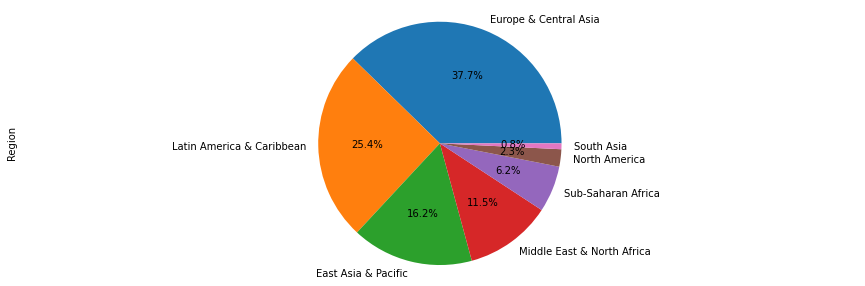

In [139]:
data_r_internet["Region"].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')
plt.axis('equal') 


 
<span style='color:Red'> Do  I need use corr for years?  </span>

__Corrolation of the years__

In [145]:
data_r_internet.corr()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
2000,1.000000,0.986508,0.949684,0.927697,0.907018,0.894200,0.878112,0.850574,0.831874,0.804657,0.795340,0.756622,0.748250,0.720362,0.699351,0.686418,0.672098,NaN,NaN
2001,0.986508,1.000000,0.961105,0.945188,0.929864,0.918601,0.906724,0.887930,0.866337,0.841111,0.825873,0.792100,0.780105,0.753260,0.732419,0.720503,0.708743,NaN,NaN
2002,0.949684,0.961105,1.000000,0.988517,0.974885,0.961772,0.942583,0.912358,0.893080,0.867337,0.847972,0.818206,0.797012,0.763182,0.745634,0.730790,0.719218,NaN,NaN
2003,0.927697,0.945188,0.988517,1.000000,0.989847,0.978179,0.961920,0.933993,0.916512,0.892119,0.875894,0.845251,0.820394,0.793230,0.776765,0.760660,0.748023,NaN,NaN
2004,0.907018,0.929864,0.974885,0.989847,1.000000,0.993842,0.981546,0.959678,0.940501,0.917234,0.899510,0.865546,0.839944,0.814970,0.798156,0.783128,0.771516,NaN,NaN
2005,0.894200,0.918601,0.961772,0.978179,0.993842,1.000000,0.992371,0.975359,0.955603,0.934671,0.914389,0.880628,0.853074,0.820986,0.805693,0.791982,0.781638,NaN,NaN
2006,0.878112,0.906724,0.942583,0.961920,0.981546,0.992371,1.000000,0.988067,0.972638,0.954366,0.933736,0.902786,0.874067,0.841742,0.825275,0.809722,0.799699,NaN,NaN
2007,0.850574,0.887930,0.912358,0.933993,0.959678,0.975359,0.988067,1.000000,0.989449,0.975776,0.958231,0.928049,0.901039,0.871199,0.856878,0.840436,0.831231,NaN,NaN
2008,0.831874,0.866337,0.893080,0.916512,0.940501,0.955603,0.972638,0.989449,1.000000,0.992054,0.976092,0.952156,0.928762,0.898216,0.884289,0.867865,0.861038,NaN,NaN
2009,0.804657,0.841111,0.867337,0.892119,0.917234,0.934671,0.954366,0.975776,0.992054,1.000000,0.990214,0.967682,0.944324,0.918903,0.905747,0.890029,0.884733,NaN,NaN


Keeping 2016

__BoxPlot__

To check "Min","Max", "Median", "Mean", "Outliers"

Text(0.5, 0.98, 'Internet users in 2016 (per 100 people)')

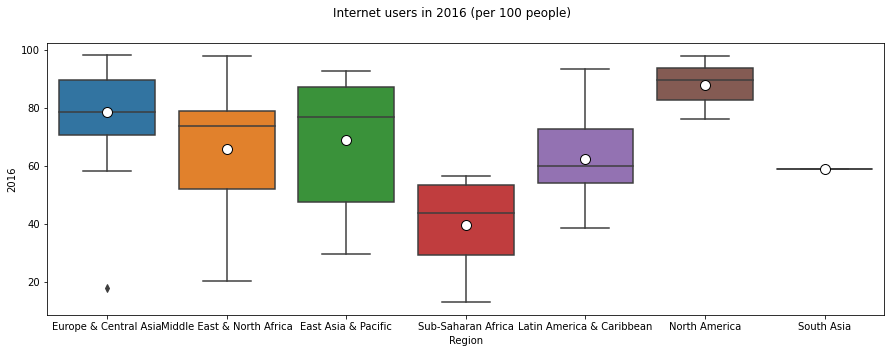

In [146]:
ax = sns.boxplot(x="Region", y="2016", data=data_r_internet,showmeans=True,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
plt.suptitle("Internet users in 2016 (per 100 people)")

In [ ]:
ax = sns.boxplot(x="Region", y="2016", data=data_r_internet,showmeans=True,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
plt.suptitle("Internet users in 2016 (per 100 people)")

Removing the countrise which are in "South Asia" and "Sub-Saharan Africa"

In [147]:
data_r_internet['Region'].unique()

array(['Europe & Central Asia', 'Middle East & North Africa',
       'East Asia & Pacific', 'Sub-Saharan Africa',
       'Latin America & Caribbean', 'North America', 'South Asia'],
      dtype=object)

In [155]:
data_internet = data_r_internet.loc[(data_r_internet['Region'] == "East Asia & Pacific")|
                                  (data_r_internet['Region'] == "Europe & Central Asia")|
                                  (data_r_internet['Region'] == "Latin America & Caribbean")|
                                  (data_r_internet['Region'] == "Middle East & North Africa")|
                                  (data_r_internet['Region'] == "North America")] 


In [156]:
data_internet['Region'].unique()

array(['Europe & Central Asia', 'Middle East & North Africa',
       'East Asia & Pacific', 'Latin America & Caribbean',
       'North America'], dtype=object)

In [161]:
data_internet.shape

(121, 9)

### Filling missing values for Internet dataset

In [157]:
##  features with the missing values
features_with_na=[features for features in data_internet.columns if data_internet[features].isnull().sum()>1]

## print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(data_internet[feature].isnull().mean(),2),  ' % missing values')

2000 0.11  % missing values
2001 0.12  % missing values
2002 0.11  % missing values
2003 0.13  % missing values
2004 0.11  % missing values
2005 0.09  % missing values
2006 0.08  % missing values
2007 0.07  % missing values
2008 0.07  % missing values
2009 0.07  % missing values
2010 0.08  % missing values
2011 0.07  % missing values
2012 0.09  % missing values
2013 0.08  % missing values
2014 0.08  % missing values
2015 0.08  % missing values
2016 0.09  % missing values
2017 1.0  % missing values
2020 1.0  % missing values


Removing the years with plus 50% of missing value

In [158]:
data_internet = data_internet.drop(['2020','2017'], axis=1)
data_internet.head()

,Region,Country_Name,Country_Code,Income_group,Internet,Indicator Code,2000,2001,2002,2003,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
96665,Europe & Central Asia,Albania,ALB,Upper middle income,Internet users (per 100 people),IT.NET.USER.P2,0.114097,0.325798,0.390081,0.971900,...,15.036115,23.86,41.20,45.0,49.0,54.655959,57.2,60.10,63.252933,66.363445
100330,Middle East & North Africa,Algeria,DZA,Upper middle income,Internet users (per 100 people),IT.NET.USER.P2,0.491706,0.646114,1.591641,2.195360,...,9.451191,10.18,11.23,12.5,14.9,18.200000,22.5,29.50,38.200000,42.945527
103995,East Asia & Pacific,American Samoa,ASM,Upper middle income,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107660,Europe & Central Asia,Andorra,AND,High income: nonOECD,Internet users (per 100 people),IT.NET.USER.P2,10.538836,NaN,11.260469,13.546413,...,70.870000,70.04,78.53,81.0,81.0,86.434425,94.0,95.90,96.910000,97.930637
114990,Latin America & Caribbean,Antigua and Barbuda,ATG,High income: nonOECD,Internet users (per 100 people),IT.NET.USER.P2,6.482226,8.899286,12.500000,17.228649,...,34.000000,38.00,42.00,47.0,52.0,58.000000,63.4,67.78,70.000000,73.000000


To comparing mean & median

In [65]:
data_internet.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,117.000000,115.000000,117.000000,114.000000,117.000000,119.000000,120.000000,121.000000,121.000000,120.000000,120.000000,121.000000,119.000000,120.000000,120.000000,120.000000,119.000000
mean,14.078514,17.571224,22.195851,26.070659,29.353996,32.240927,35.497360,39.163521,42.913412,46.425321,50.107048,53.723551,57.802787,60.803619,63.806321,66.707587,69.292352
std,14.948330,17.239897,19.975670,21.583947,22.507564,23.332058,23.779276,24.259553,24.277664,24.142968,23.533872,22.782069,22.187872,22.138704,21.353163,20.328587,19.650472
min,0.105046,0.100000,0.270377,0.370682,0.464815,0.900000,0.952344,0.930000,1.000000,1.060000,2.500000,3.100000,6.500000,8.900000,10.200000,12.400000,13.000000
25%,3.076431,4.478943,6.152650,7.923795,10.000000,12.629017,15.985419,20.030000,23.180000,27.647500,33.225000,38.000000,41.870859,45.675000,49.505000,54.114325,57.325601
50%,7.038683,10.935026,17.330000,20.566807,24.266544,26.300000,28.937056,34.000000,39.300000,43.350000,46.700000,52.000000,59.516200,63.600000,66.650000,69.709668,73.000000
75%,21.384731,26.959045,30.180000,38.802220,42.252266,48.254585,53.725000,61.000000,63.000000,65.235000,69.212500,70.490000,73.715004,77.973875,79.734068,79.632177,81.906343
max,52.000000,64.000000,79.120000,83.140000,83.890000,87.000000,89.510000,90.600000,91.000000,93.000000,93.390000,94.819687,96.209800,96.546800,98.160000,98.323610,98.240016


Just keeping the 3 last years '2014','2015', '2016' with highest corrolation

In [67]:
data_internet.columns

Index(['Region', 'Country_Name', 'Country Code', 'Income_group', 'Internet',
       'Indicator Code', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016'],
      dtype='object')

In [159]:
data_internet = data_internet.drop(['2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013'], axis=1)


Applying median to filling null values

In [69]:
data_internet['2014']= data_internet['2014'].fillna(data_internet['2014'].median())
data_internet['2015']= data_internet['2015'].fillna(data_internet['2015'].median())
data_internet['2016']= data_internet['2016'].fillna(data_internet['2016'].median())


Cheking missing values to be sure!

In [70]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 96665 to 866315
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          130 non-null    object 
 1   Country_Name    130 non-null    object 
 2   Country Code    130 non-null    object 
 3   Income_group    130 non-null    object 
 4   Internet        130 non-null    object 
 5   Indicator Code  130 non-null    object 
 6   2014            130 non-null    float64
 7   2015            130 non-null    float64
 8   2016            130 non-null    float64
dtypes: float64(3), object(6)
memory usage: 10.2+ KB


In [71]:
data_internet.groupby('Region').mean()

,2014,2015,2016
Region,,,
East Asia & Pacific,62.824716,66.233161,69.788873
Europe & Central Asia,74.430671,76.328643,78.477900
Latin America & Caribbean,57.196005,60.918097,63.844501
Middle East & North Africa,59.959636,63.071854,65.923941
North America,85.640000,87.115937,88.005579
South Asia,49.280000,54.461955,59.092590
Sub-Saharan Africa,32.971742,37.352811,39.871188


Text(0.5, 0.98, 'Internet users in 2015 (per 100 people)')

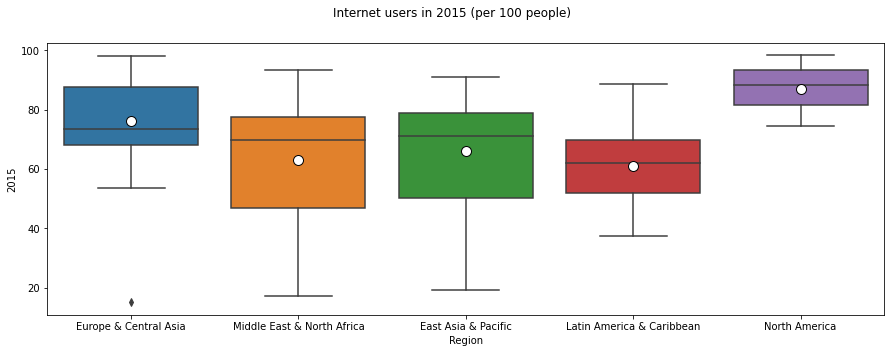

In [118]:
ax = sns.boxplot(x="Region", y="2015", data=data_internet,showmeans=True,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
from pylab import rcParams
rcParams['figure.figsize'] = 15,5

plt.suptitle("Internet users in 2015 (per 100 people)")

### Relation between continent

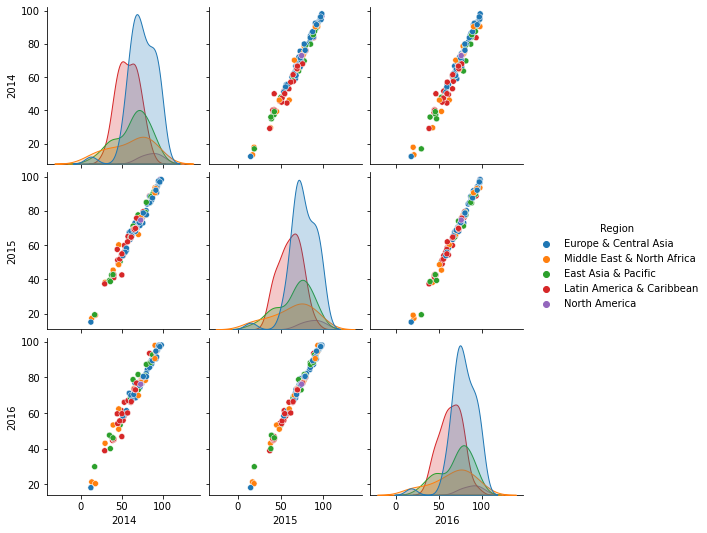

In [76]:
sns.pairplot(data_internet, hue='Region', height=2.5);

### To summarize Internet Data

In [77]:
# Using pivot table and choosing three years randomly

pivot_Internet = pd.pivot_table(data_internet, values=['2014','2015','2016'], index=['Country_Name','Region'],
                    aggfunc={'2014': np.mean, '2015': np.mean, '2016': np.mean
                            })
pivot_Internet

,,2014,2015,2016
Country_Name,Region,,,
Albania,Europe & Central Asia,60.10,63.252933,66.363445
Algeria,Middle East & North Africa,29.50,38.200000,42.945527
American Samoa,East Asia & Pacific,66.65,69.709668,73.000000
Andorra,Europe & Central Asia,95.90,96.910000,97.930637
Antigua and Barbuda,Latin America & Caribbean,67.78,70.000000,73.000000
...,...,...,...,...
United Kingdom,Europe & Central Asia,91.61,92.000300,94.775801
United States,North America,73.00,74.554202,76.176737
Uruguay,Latin America & Caribbean,61.46,64.600000,66.400000


__Sorting the values for each year to find the countries with highest access to the Internet__

In [78]:
pivot_Internet.sort_values(by=['2016','2015','2014'], inplace=True,ascending=False)
pivot_Internet.head(10)

,,2014,2015,2016
Country_Name,Region,,,
Iceland,Europe & Central Asia,98.160000,98.200000,98.240016
Liechtenstein,Europe & Central Asia,95.210000,96.641195,98.093904
Bermuda,North America,96.800000,98.323610,98.000000
Bahrain,Middle East & North Africa,90.503133,93.478301,97.999981
Andorra,Europe & Central Asia,95.900000,96.910000,97.930637
Luxembourg,Europe & Central Asia,94.670000,97.334100,97.493930
Norway,Europe & Central Asia,96.300000,96.810300,97.298204
Denmark,Europe & Central Asia,95.990000,96.330500,96.967785
Monaco,Europe & Central Asia,92.400000,93.363302,95.208178


In [102]:
pivot_Internet.sort_values(by=['2016'], inplace=True,ascending=False)
pivot_Internet.head(10)

,,2014,2015,2016
Country_Name,Region,,,
Iceland,Europe & Central Asia,98.160000,98.200000,98.240016
Liechtenstein,Europe & Central Asia,95.210000,96.641195,98.093904
Bermuda,North America,96.800000,98.323610,98.000000
Bahrain,Middle East & North Africa,90.503133,93.478301,97.999981
Andorra,Europe & Central Asia,95.900000,96.910000,97.930637
Luxembourg,Europe & Central Asia,94.670000,97.334100,97.493930
Norway,Europe & Central Asia,96.300000,96.810300,97.298204
Denmark,Europe & Central Asia,95.990000,96.330500,96.967785
Monaco,Europe & Central Asia,92.400000,93.363302,95.208178


In [106]:
pivot_Internet.describe()

,2016
count,121.000000
mean,71.658907
std,17.375280
min,17.990324
25%,61.324253
50%,73.000000
75%,81.642985
max,98.240016


The name of countries with hightest Internet access:
    
__Iceland, Liechtenstein, Bermuda, Bahrain,   Andorra,Luxembourg ,Norway, Monaco, Denmark,Faroe Islands__

__Create New DF with collected countries__

In [90]:
contries_to_keep = [ 'Liechtenstein', 'Norway', 'Bermuda','Bahrain','Andorra','Iceland', 'Denmark','Luxembourg',
                   'Faroe Islands','Monaco']

Internet = data_internet[data_internet.Country_Name.isin(contries_to_keep)]

Internet.head()

,Region,Country_Name,Country Code,Income_group,Internet,Indicator Code,2014,2015,2016
107660,Europe & Central Asia,Andorra,AND,High income: nonOECD,Internet users (per 100 people),IT.NET.USER.P2,95.900000,96.910000,97.930637
144310,Middle East & North Africa,Bahrain,BHR,High income: nonOECD,Internet users (per 100 people),IT.NET.USER.P2,90.503133,93.478301,97.999981
169965,North America,Bermuda,BMU,High income: nonOECD,Internet users (per 100 people),IT.NET.USER.P2,96.800000,98.323610,98.000000
283580,Europe & Central Asia,Denmark,DNK,High income: OECD,Internet users (per 100 people),IT.NET.USER.P2,95.990000,96.330500,96.967785
323895,Europe & Central Asia,Faroe Islands,FRO,High income: nonOECD,Internet users (per 100 people),IT.NET.USER.P2,93.300000,94.200000,95.108682


In [94]:
Internet.shape

(10, 9)

### Pair plot of 10 countries with highest Internet access

C:\Users\azade\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\azade\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\azade\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\azade\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\azade\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\azade\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

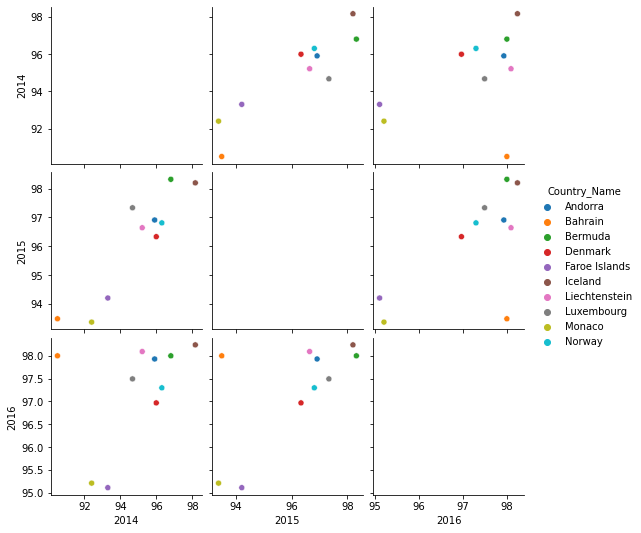

In [96]:
sns.pairplot(Internet, hue='Country_Name', height=2.5);


## Population

__Interesting indicator__

- Population, total(SP.POP.TOTL)
- Population, ages 15-24, total(SP.POP.1524.TO.UN)   
- School age population, tertiary education, both sexes (number)(SP.TER.TOTL.IN)

In [162]:
codes_to_keep = ['SP.POP.TOTL', 
                 'SP.POP.1524.TO.UN', 
                 'SP.TER.TOTL.IN']
data_r_pop = data_r_income[data_r_income['Indicator Code'].isin(codes_to_keep)]
data_r_pop.head()

,Region,Country Name,Country Code,Income_group,Indicator Name,Indicator Code,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
97616,Europe & Central Asia,Albania,ALB,Upper middle income,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,257150.0,255769.0,256577.0,259438.0,...,278853.0,274639.0,271544.0,274631.0,276635.0,277193.0,276247.0,NaN,NaN,NaN
97772,Europe & Central Asia,Albania,ALB,Upper middle income,"Population, ages 15-24, total",SP.POP.1524.TO.UN,538251.0,545188.0,554507.0,565217.0,...,609841.0,608456.0,603104.0,594101.0,582411.0,569427.0,556269.0,NaN,NaN,NaN
97823,Europe & Central Asia,Albania,ALB,Upper middle income,"Population, total",SP.POP.TOTL,3089027.0,3060173.0,3051010.0,3039616.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,NaN,NaN
101281,Middle East & North Africa,Algeria,DZA,Upper middle income,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,3437146.0,3527551.0,3617323.0,3696056.0,...,3855518.0,3835387.0,3809177.0,3754955.0,3687770.0,3600292.0,3492401.0,NaN,NaN,NaN
101437,Middle East & North Africa,Algeria,DZA,Upper middle income,"Population, ages 15-24, total",SP.POP.1524.TO.UN,6901569.0,7049439.0,7176450.0,7280112.0,...,7340706.0,7245764.0,7118500.0,6964424.0,6795040.0,6625398.0,6467818.0,NaN,NaN,NaN


In [163]:
data_r_pop.groupby('Indicator Code').count()

,Region,Country Name,Country Code,Income_group,Indicator Name,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Indicator Code,,,,,,,,,,,,,,,,,,,,,
SP.POP.1524.TO.UN,130,130,130,130,130,108,109,110,110,109,...,100,100,100,100,100,100,100,0,0,0
SP.POP.TOTL,130,130,130,130,130,130,130,130,130,130,...,130,130,130,130,130,127,127,127,0,0
SP.TER.TOTL.IN,130,130,130,130,130,109,110,110,110,110,...,110,107,101,98,95,110,84,2,0,0


Working on 2015

Text(0.5, 0.98, 'Internet users in 2015 (per 100 people)')

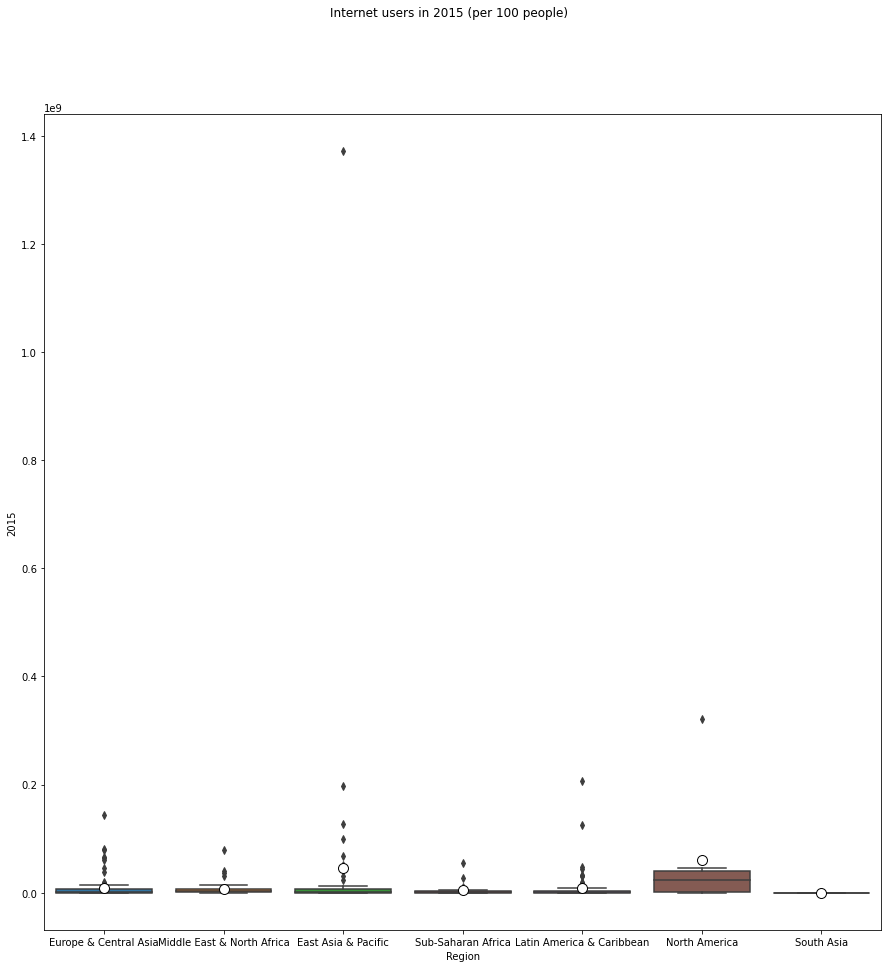

In [187]:
ax = sns.boxplot(x="Region", y="2015", data=data_r_pop,showmeans=True,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
from pylab import rcParams
rcParams['figure.figsize'] = 15,15

plt.suptitle("Internet users in 2015 (per 100 people)")

__Remove outliers__

In [ ]:
mean_pop= data_taill.mean

### Population missing values:

- __Total population__

In [191]:
data_pop_tot = data_r_pop.loc[(data_r_income['Indicator Code'] == "SP.POP.TOTL")] 


Text(0.5, 0.98, 'Total population in 2015')

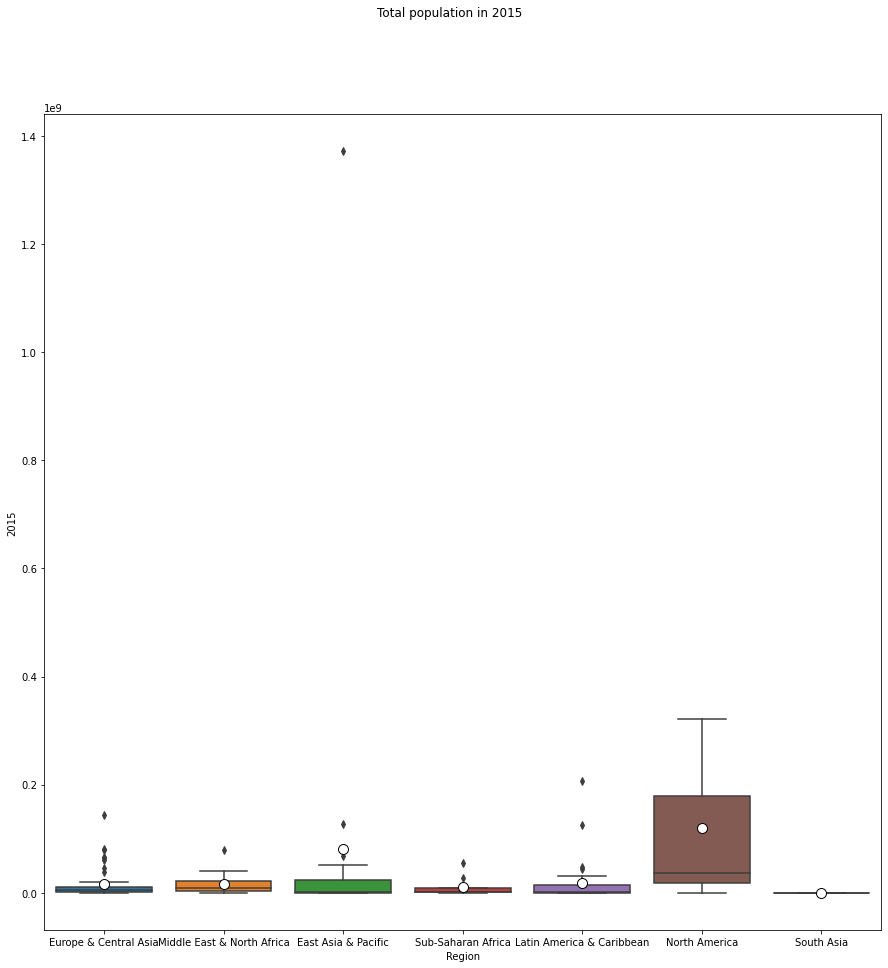

In [188]:
ax = sns.boxplot(x="Region", y="2015", data=data_pop_tot,showmeans=True,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
from pylab import rcParams
rcParams['figure.figsize'] = 15,15

plt.suptitle("Total population in 2015")

__Missing values for total population__

In [189]:

features_with_na=[features for features in data_pop_tot.columns if data_pop_tot[features].isnull().sum()>1]

## print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(data_pop_tot[feature].isnull().mean(),2),  ' % missing values')


2014 0.02  % missing values
2015 0.02  % missing values
2016 0.02  % missing values
2017 1.0  % missing values
2020 1.0  % missing values


Removing the years with plus 50% of missing value

In [379]:
data_pop_tot = data_pop_tot.drop(['2020','2017'], axis = 1)

In [380]:
data_pop_tot.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.270000e+02,1.270000e+02,1.270000e+02
mean,2.583025e+07,2.603704e+07,2.623773e+07,2.643642e+07,2.663679e+07,2.683928e+07,2.704489e+07,2.725211e+07,2.746632e+07,2.767798e+07,2.788377e+07,2.807666e+07,2.828626e+07,2.849920e+07,2.939138e+07,2.960839e+07,2.982756e+07
std,1.152745e+08,1.161248e+08,1.169173e+08,1.176606e+08,1.183790e+08,1.190948e+08,1.197852e+08,1.204413e+08,1.210904e+08,1.217221e+08,1.223399e+08,1.229465e+08,1.235719e+08,1.242069e+08,1.262607e+08,1.269270e+08,1.276330e+08
min,9.420000e+03,9.512000e+03,9.635000e+03,9.767000e+03,9.894000e+03,1.002700e+04,1.013700e+04,1.024300e+04,1.034000e+04,1.044100e+04,1.053100e+04,1.062800e+04,1.072500e+04,1.081900e+04,1.090800e+04,1.100100e+04,1.109700e+04
25%,2.529480e+05,2.589092e+05,2.645240e+05,2.699120e+05,2.738405e+05,2.763260e+05,2.789660e+05,2.817142e+05,2.845305e+05,2.873348e+05,2.891870e+05,2.902042e+05,2.913678e+05,2.928228e+05,3.669315e+05,3.730630e+05,3.790930e+05
50%,3.410390e+06,3.415338e+06,3.515034e+06,3.721698e+06,3.804082e+06,3.801446e+06,3.792341e+06,3.778498e+06,3.762232e+06,3.743486e+06,3.721804e+06,3.698324e+06,3.710569e+06,3.774972e+06,4.238389e+06,4.203604e+06,4.424762e+06
75%,1.225913e+07,1.243620e+07,1.260854e+07,1.277842e+07,1.294897e+07,1.312249e+07,1.329967e+07,1.348001e+07,1.366311e+07,1.384811e+07,1.403428e+07,1.422168e+07,1.441029e+07,1.459920e+07,1.638406e+07,1.654215e+07,1.670174e+07
max,1.262645e+09,1.271850e+09,1.280400e+09,1.288400e+09,1.296075e+09,1.303720e+09,1.311020e+09,1.317885e+09,1.324655e+09,1.331260e+09,1.337705e+09,1.344130e+09,1.350695e+09,1.357380e+09,1.364270e+09,1.371220e+09,1.378665e+09


In [381]:
data_pop_tot['2000'] = data_pop_tot['2000'].fillna(data_pop_tot['2000'].median())
data_pop_tot['2001'] = data_pop_tot['2001'].fillna(data_pop_tot['2001'].median())
data_pop_tot['2002'] = data_pop_tot['2002'].fillna(data_pop_tot['2002'].median())
data_pop_tot['2003'] = data_pop_tot['2003'].fillna(data_pop_tot['2003'].median())
data_pop_tot['2004'] = data_pop_tot['2004'].fillna(data_pop_tot['2004'].median())
data_pop_tot['2005'] = data_pop_tot['2005'].fillna(data_pop_tot['2005'].median())
data_pop_tot['2006'] = data_pop_tot['2006'].fillna(data_pop_tot['2006'].median())
data_pop_tot['2007'] = data_pop_tot['2007'].fillna(data_pop_tot['2007'].median())
data_pop_tot['2008'] = data_pop_tot['2008'].fillna(data_pop_tot['2008'].median())
data_pop_tot['2009'] = data_pop_tot['2009'].fillna(data_pop_tot['2009'].median())

data_pop_tot['2010'] = data_pop_tot['2010'].fillna(data_pop_tot['2010'].median())
data_pop_tot['2011'] = data_pop_tot['2011'].fillna(data_pop_tot['2011'].median())
data_pop_tot['2012'] = data_pop_tot['2012'].fillna(data_pop_tot['2012'].median())
data_pop_tot['2013'] = data_pop_tot['2013'].fillna(data_pop_tot['2013'].median())
data_pop_tot['2014'] = data_pop_tot['2014'].fillna(data_pop_tot['2014'].median())
data_pop_tot['2015'] = data_pop_tot['2015'].fillna(data_pop_tot['2015'].median())
data_pop_tot['2016'] = data_pop_tot['2016'].fillna(data_pop_tot['2016'].median())

Checking missing value after filling.

In [382]:
data_pop_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 97823 to 867473
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          130 non-null    object 
 1   Country Name    130 non-null    object 
 2   Country Code    130 non-null    object 
 3   Income_group    130 non-null    object 
 4   Indicator Name  130 non-null    object 
 5   Indicator Code  130 non-null    object 
 6   2000            130 non-null    float64
 7   2001            130 non-null    float64
 8   2002            130 non-null    float64
 9   2003            130 non-null    float64
 10  2004            130 non-null    float64
 11  2005            130 non-null    float64
 12  2006            130 non-null    float64
 13  2007            130 non-null    float64
 14  2008            130 non-null    float64
 15  2009            130 non-null    float64
 16  2010            130 non-null    float64
 17  2011            130 non-null

C:\Users\azade\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\azade\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\azade\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\azade\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\azade\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\azade\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

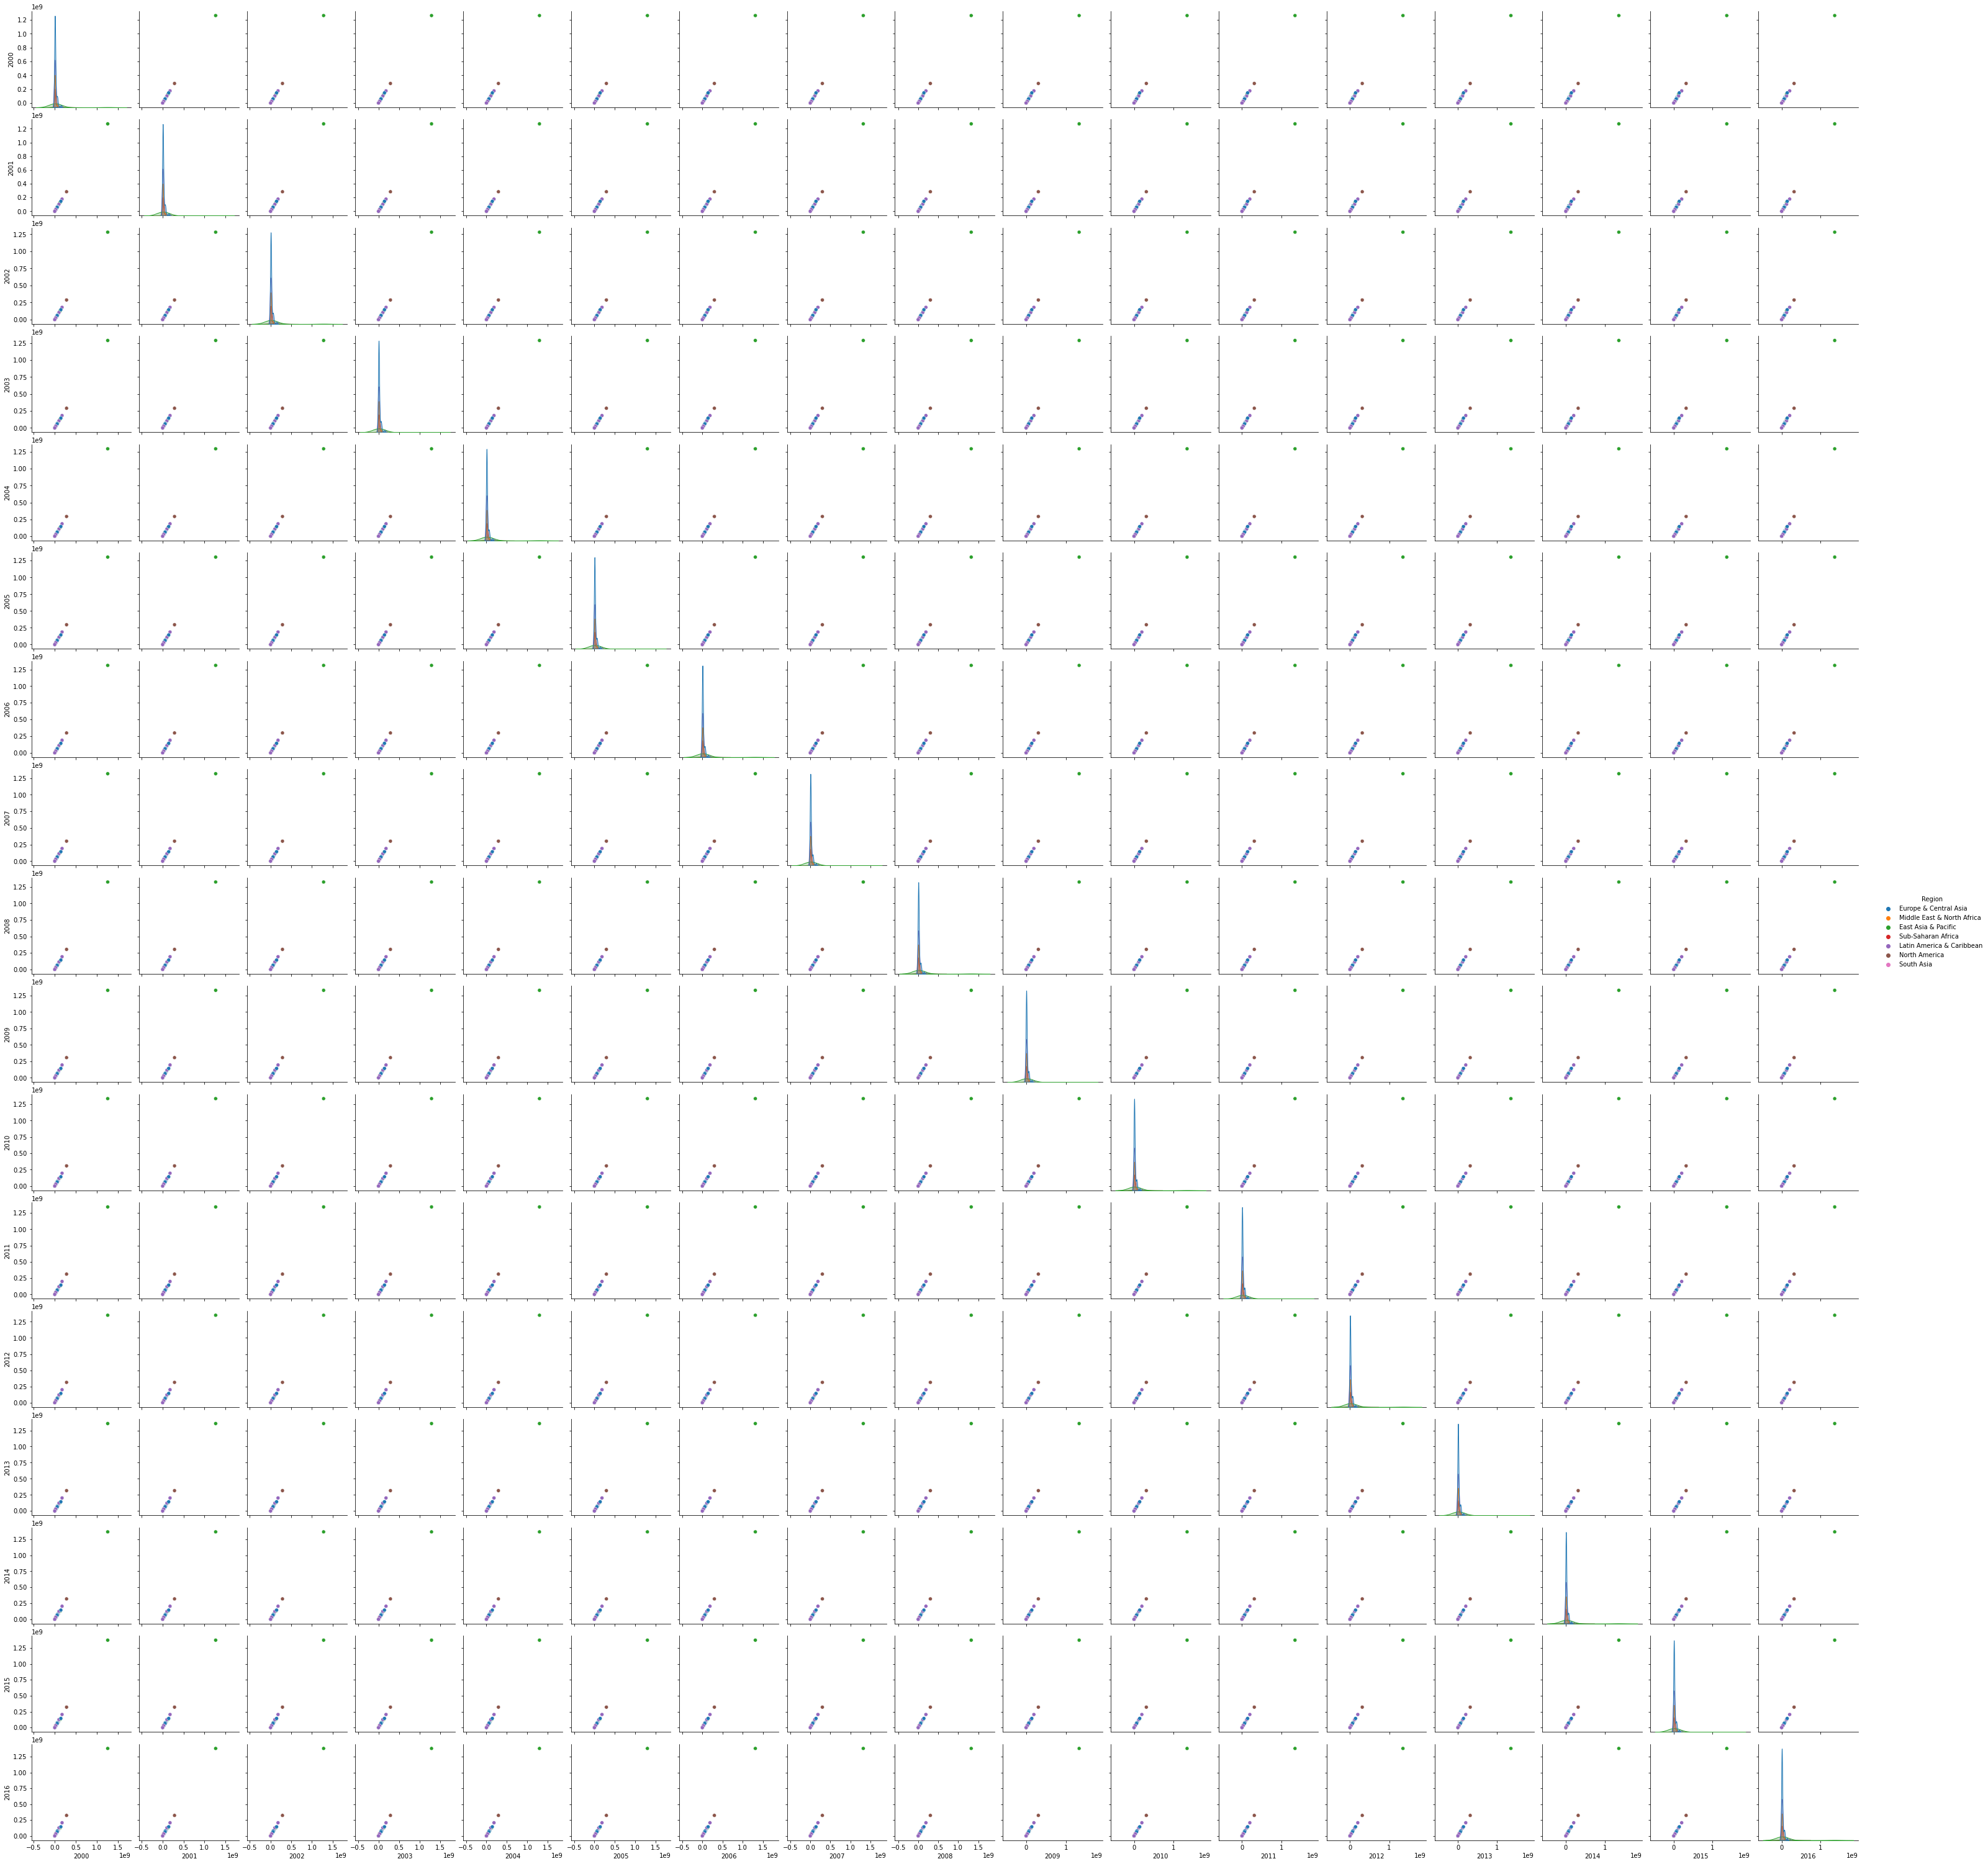

In [392]:
sns.pairplot(data_pop_tot, hue='Region', height=2.5);

Just keeping the years '2014', '2015','2016'

In [384]:
data_pop_tot.groupby('Region').mean()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Region,,,,,,,,,,,,,,,,,
East Asia & Pacific,7.422986e+07,7.477485e+07,7.527737e+07,7.574245e+07,7.618353e+07,7.661856e+07,7.705084e+07,7.745812e+07,7.787796e+07,7.827553e+07,7.866162e+07,7.903980e+07,7.942697e+07,7.981463e+07,8.021479e+07,8.061465e+07,8.103278e+07
Europe & Central Asia,1.560213e+07,1.563049e+07,1.566401e+07,1.571000e+07,1.576145e+07,1.581364e+07,1.586565e+07,1.592469e+07,1.598955e+07,1.605486e+07,1.610856e+07,1.613437e+07,1.619574e+07,1.626814e+07,1.634329e+07,1.641719e+07,1.649547e+07
Latin America & Caribbean,1.432710e+07,1.452059e+07,1.470967e+07,1.489589e+07,1.508146e+07,1.526788e+07,1.545547e+07,1.564385e+07,1.583262e+07,1.602075e+07,1.620763e+07,1.639225e+07,1.657531e+07,1.675635e+07,1.731254e+07,1.748362e+07,1.767431e+07
Middle East & North Africa,1.202989e+07,1.226000e+07,1.249055e+07,1.272707e+07,1.297697e+07,1.324506e+07,1.353208e+07,1.383632e+07,1.415650e+07,1.449325e+07,1.483807e+07,1.519385e+07,1.555844e+07,1.592444e+07,1.628240e+07,1.662530e+07,1.694978e+07
North America,1.043313e+08,1.053711e+08,1.063500e+08,1.072824e+08,1.082880e+08,1.092976e+08,1.103383e+08,1.113947e+08,1.124683e+08,1.134886e+08,1.144729e+08,1.153569e+08,1.162712e+08,1.171418e+08,1.180577e+08,1.189368e+08,1.198264e+08
South Asia,2.860000e+05,2.920000e+05,2.970000e+05,3.040000e+05,3.120000e+05,3.210000e+05,3.330000e+05,3.490000e+05,3.620000e+05,3.600000e+05,3.670000e+05,3.770000e+05,3.850000e+05,3.930000e+05,4.010000e+05,4.091630e+05,4.174920e+05
Sub-Saharan Africa,8.509853e+06,8.645530e+06,8.802424e+06,8.966418e+06,9.137309e+06,9.314852e+06,9.498979e+06,9.689880e+06,9.888203e+06,1.009411e+07,1.030851e+07,1.053076e+07,1.076194e+07,1.100062e+07,1.124552e+07,1.149595e+07,1.175147e+07


Text(0.5, 0.98, 'Population, total')

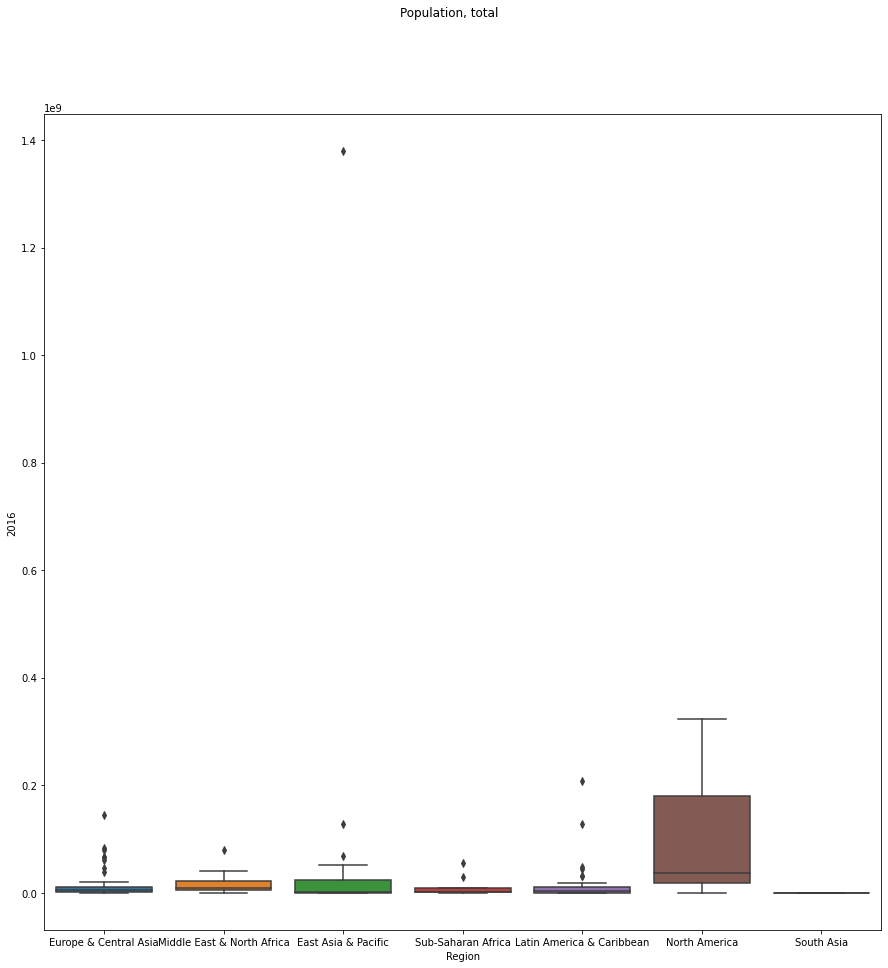

In [407]:
rcParams['figure.figsize'] = 15, 15
ax = sns.boxplot(x="Region", y="2016", data=data_pop_tot)

plt.suptitle("Population, total")

Text(0.5, 0.98, 'Population, total')

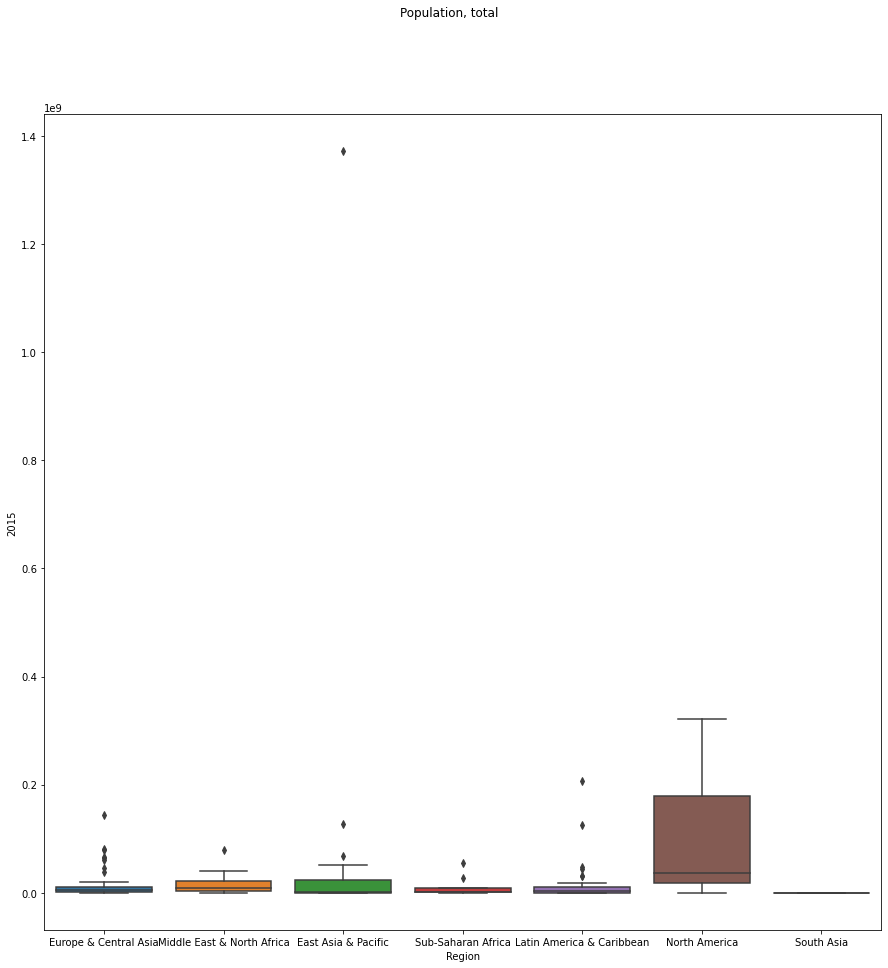

In [406]:

rcParams['figure.figsize'] = 15, 15
ax = sns.boxplot(x="Region", y="2015", data=data_pop_tot)

plt.suptitle("Population, total")

### To summarize total population Data

In [383]:
# Using pivot table
# Choosing 3 years randomely
pivot_data_pop_tot = pd.pivot_table(data_pop_tot, values=['2014','2015','2016'], index=['Country Name','Region'],
                    aggfunc={'2014': np.mean, '2015': np.mean, '2016': np.mean
                            })
pivot_data_pop_tot

,,2014,2015,2016
Country Name,Region,,,
Albania,Europe & Central Asia,2889104.0,2880703.0,2876101.0
Algeria,Middle East & North Africa,39113313.0,39871528.0,40606052.0
American Samoa,East Asia & Pacific,55437.0,55537.0,55599.0
Andorra,Europe & Central Asia,79223.0,78014.0,77281.0
Angola,Sub-Saharan Africa,26920466.0,27859305.0,28813463.0
...,...,...,...,...
United Kingdom,Europe & Central Asia,64613160.0,65128861.0,65637239.0
United States,North America,318563456.0,320896618.0,323127513.0
Uruguay,Latin America & Caribbean,3419546.0,3431552.0,3444006.0


__Sorting the values for each year to find the countries with highest Population__

In [413]:
pivot_data_pop_tot.sort_values(by=['2015','2016'], inplace=True,ascending=False)
pivot_data_pop_tot.head(5)

,,2014,2015,2016
Country Name,Region,,,
China,East Asia & Pacific,1.364270e+09,1.371220e+09,1.378665e+09
United States,North America,3.185635e+08,3.208966e+08,3.231275e+08
Brazil,Latin America & Caribbean,2.042131e+08,2.059621e+08,2.076529e+08
Russian Federation,Europe & Central Asia,1.438197e+08,1.440969e+08,1.443424e+08
Japan,East Asia & Pacific,1.272760e+08,1.271410e+08,1.269945e+08


In [414]:
pivot_data_pop_tot.sort_values(by=['2016','2015'], inplace=True,ascending=False)
pivot_data_pop_tot.head(10)

,,2014,2015,2016
Country Name,Region,,,
China,East Asia & Pacific,1.364270e+09,1.371220e+09,1.378665e+09
United States,North America,3.185635e+08,3.208966e+08,3.231275e+08
Brazil,Latin America & Caribbean,2.042131e+08,2.059621e+08,2.076529e+08
Russian Federation,Europe & Central Asia,1.438197e+08,1.440969e+08,1.443424e+08
Mexico,Latin America & Caribbean,1.242216e+08,1.258909e+08,1.275404e+08
Japan,East Asia & Pacific,1.272760e+08,1.271410e+08,1.269945e+08
Germany,Europe & Central Asia,8.098250e+07,8.168661e+07,8.266768e+07
"Iran, Islamic Rep.",Middle East & North Africa,7.841109e+07,7.936049e+07,8.027743e+07
Turkey,Europe & Central Asia,7.703063e+07,7.827147e+07,7.951243e+07


The countries with highest population:
    
__'China', 'United States', 'Brazil', 'Russian Federation','Mexico', 'Japan'__

__Rename Country Name__

In [415]:
data_pop_tot= data_pop_tot.rename({"Country Name": "Country_Name"},axis=1)
data_pop_tot.head()

,Region,Country_Name,Country Code,Income_group,Indicator Name,Indicator Code,2000,2001,2002,2003,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
97823,Europe & Central Asia,Albania,ALB,Upper middle income,"Population, total",SP.POP.TOTL,3089027.0,3060173.0,3051010.0,3039616.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
101488,Middle East & North Africa,Algeria,DZA,Upper middle income,"Population, total",SP.POP.TOTL,31183660.0,31592153.0,31995046.0,32403514.0,...,34300076.0,34860715.0,35465760.0,36117637.0,36819558.0,37565847.0,38338562.0,39113313.0,39871528.0,40606052.0
105153,East Asia & Pacific,American Samoa,ASM,Upper middle income,"Population, total",SP.POP.TOTL,57521.0,58175.0,58731.0,59117.0,...,57903.0,57030.0,56227.0,55637.0,55320.0,55230.0,55307.0,55437.0,55537.0,55599.0
108818,Europe & Central Asia,Andorra,AND,High income: nonOECD,"Population, total",SP.POP.TOTL,65390.0,67341.0,70049.0,73182.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0
112483,Sub-Saharan Africa,Angola,AGO,Upper middle income,"Population, total",SP.POP.TOTL,16440924.0,16983266.0,17572649.0,18203369.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0


__Create new DF with selected countries__

In [416]:
contries_to_keep = ['China', 'United States', 'Brazil', 'Russian Federation','Mexico', 'Japan']

data_pop_tot = data_pop_tot[data_pop_tot.Country_Name.isin(contries_to_keep)]

data_pop_tot.head()

,Region,Country_Name,Country Code,Income_group,Indicator Name,Indicator Code,2000,2001,2002,2003,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
189448,Latin America & Caribbean,Brazil,BRA,Upper middle income,"Population, total",SP.POP.TOTL,1.752876e+08,1.777507e+08,1.801510e+08,1.824821e+08,...,1.910266e+08,1.929790e+08,1.948960e+08,1.967963e+08,1.986867e+08,2.005610e+08,2.024086e+08,2.042131e+08,2.059621e+08,2.076529e+08
240758,East Asia & Pacific,China,CHN,Upper middle income,"Population, total",SP.POP.TOTL,1.262645e+09,1.271850e+09,1.280400e+09,1.288400e+09,...,1.317885e+09,1.324655e+09,1.331260e+09,1.337705e+09,1.344130e+09,1.350695e+09,1.357380e+09,1.364270e+09,1.371220e+09,1.378665e+09
445998,East Asia & Pacific,Japan,JPN,High income: OECD,"Population, total",SP.POP.TOTL,1.268430e+08,1.271490e+08,1.274450e+08,1.277180e+08,...,1.280010e+08,1.280630e+08,1.280470e+08,1.280700e+08,1.278330e+08,1.276290e+08,1.274450e+08,1.272760e+08,1.271410e+08,1.269945e+08
555948,Latin America & Caribbean,Mexico,MEX,Upper middle income,"Population, total",SP.POP.TOTL,1.017197e+08,1.030671e+08,1.043556e+08,1.056405e+08,...,1.118363e+08,1.136618e+08,1.155052e+08,1.173189e+08,1.190900e+08,1.208283e+08,1.225360e+08,1.242216e+08,1.258909e+08,1.275404e+08
676893,Europe & Central Asia,Russian Federation,RUS,High income: nonOECD,"Population, total",SP.POP.TOTL,1.465966e+08,1.459761e+08,1.453060e+08,1.446483e+08,...,1.428051e+08,1.427424e+08,1.427853e+08,1.428494e+08,1.429609e+08,1.432017e+08,1.435069e+08,1.438197e+08,1.440969e+08,1.443424e+08


In [417]:
data_pop_tot.shape

(6, 23)

In [66]:
data_pop_tot

,Country_Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
189448,Brazil,1.752876e+08,1.777507e+08,1.801510e+08,1.824821e+08,1.847385e+08,1.869174e+08,1.890124e+08,1.910266e+08,1.929790e+08,1.948960e+08,1.967963e+08,1.986867e+08,2.005610e+08,2.024086e+08,2.042131e+08,2.059621e+08,2.076529e+08
240758,China,1.262645e+09,1.271850e+09,1.280400e+09,1.288400e+09,1.296075e+09,1.303720e+09,1.311020e+09,1.317885e+09,1.324655e+09,1.331260e+09,1.337705e+09,1.344130e+09,1.350695e+09,1.357380e+09,1.364270e+09,1.371220e+09,1.378665e+09
445998,Japan,1.268430e+08,1.271490e+08,1.274450e+08,1.277180e+08,1.277610e+08,1.277730e+08,1.278540e+08,1.280010e+08,1.280630e+08,1.280470e+08,1.280700e+08,1.278330e+08,1.276290e+08,1.274450e+08,1.272760e+08,1.271410e+08,1.269945e+08
555948,Mexico,1.017197e+08,1.030671e+08,1.043556e+08,1.056405e+08,1.069956e+08,1.084722e+08,1.100924e+08,1.118363e+08,1.136618e+08,1.155052e+08,1.173189e+08,1.190900e+08,1.208283e+08,1.225360e+08,1.242216e+08,1.258909e+08,1.275404e+08
676893,Russian Federation,1.465966e+08,1.459761e+08,1.453060e+08,1.446483e+08,1.440671e+08,1.435185e+08,1.430495e+08,1.428051e+08,1.427424e+08,1.427853e+08,1.428494e+08,1.429609e+08,1.432017e+08,1.435069e+08,1.438197e+08,1.440969e+08,1.443424e+08
845483,United States,2.821624e+08,2.849690e+08,2.876252e+08,2.901079e+08,2.928053e+08,2.955166e+08,2.983799e+08,3.012312e+08,3.040940e+08,3.067715e+08,3.093482e+08,3.116634e+08,3.139984e+08,3.162049e+08,3.185635e+08,3.208966e+08,3.231275e+08


__-- Population, ages 15-24, total__

In [194]:
data_pop_15_24= data_r_pop.loc[(data_r_pop['Indicator Code']== "SP.POP.1524.TO.UN")]

Text(0.5, 0.98, 'Population age 15-24, in 2015')

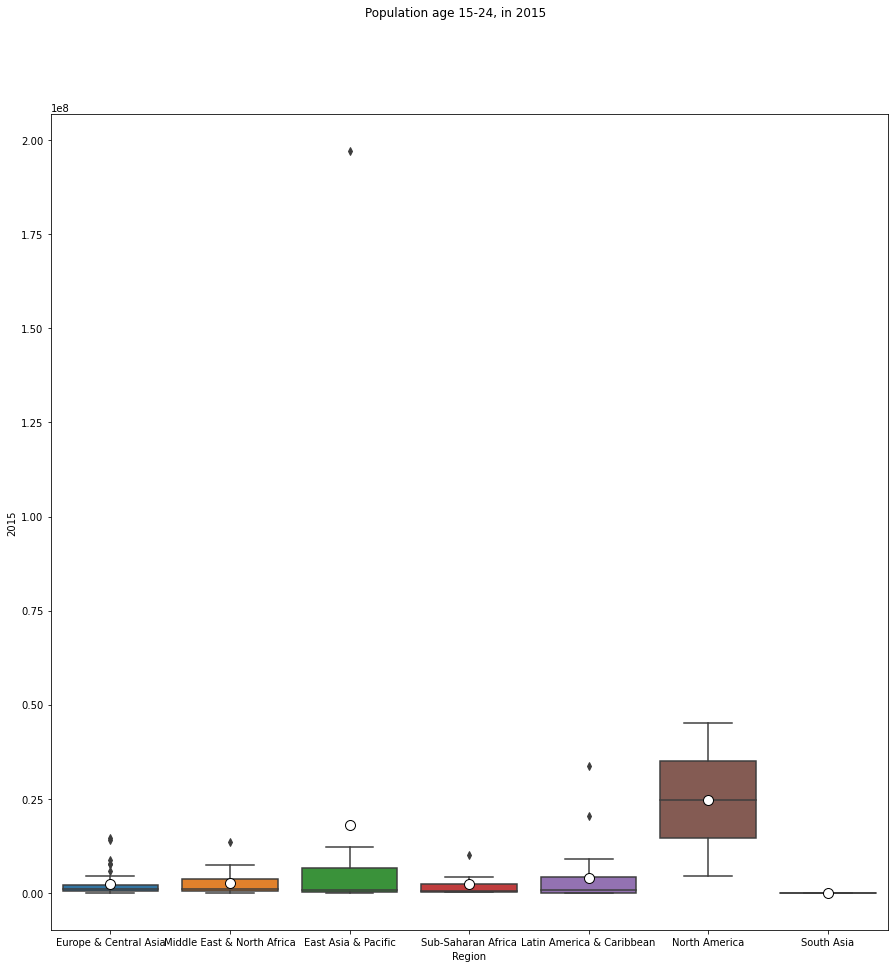

In [195]:
ax = sns.boxplot(x="Region", y="2015", data=data_pop_15_24,showmeans=True,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
from pylab import rcParams
rcParams['figure.figsize'] = 15,15

plt.suptitle("Population age 15-24, in 2015")

__Missing values for Population, ages 15-24__

In [431]:
features_with_na=[features for features in data_pop_15_24.columns if data_pop_15_24[features].isnull().sum()>1]

## print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(data_pop_15_24[feature].isnull().mean(),2),  ' % missing values')

2000 0.17  % missing values
2001 0.16  % missing values
2002 0.15  % missing values
2003 0.15  % missing values
2004 0.16  % missing values
2005 0.16  % missing values
2006 0.19  % missing values
2007 0.23  % missing values
2008 0.23  % missing values
2009 0.23  % missing values
2010 0.23  % missing values
2011 0.23  % missing values
2012 0.23  % missing values
2013 0.23  % missing values
2014 0.23  % missing values
2015 0.23  % missing values
2016 1.0  % missing values
2017 1.0  % missing values
2020 1.0  % missing values


In [433]:
data_pop_15_24= data_pop_15_24.drop(['2020','2017','2016'], axis=1)

In [434]:
data_pop_15_24['2000'] = data_pop_15_24['2000'].fillna(data_pop_15_24['2000'].median())
data_pop_15_24['2001'] = data_pop_15_24['2001'].fillna(data_pop_15_24['2001'].median())
data_pop_15_24['2002'] = data_pop_15_24['2002'].fillna(data_pop_15_24['2002'].median())
data_pop_15_24['2003'] = data_pop_15_24['2003'].fillna(data_pop_15_24['2003'].median())
data_pop_15_24['2004'] = data_pop_15_24['2004'].fillna(data_pop_15_24['2004'].median())
data_pop_15_24['2005'] = data_pop_15_24['2005'].fillna(data_pop_15_24['2005'].median())
data_pop_15_24['2006'] = data_pop_15_24['2006'].fillna(data_pop_15_24['2006'].median())
data_pop_15_24['2007'] = data_pop_15_24['2007'].fillna(data_pop_15_24['2007'].median())
data_pop_15_24['2008'] = data_pop_15_24['2008'].fillna(data_pop_15_24['2008'].median())
data_pop_15_24['2009'] = data_pop_15_24['2009'].fillna(data_pop_15_24['2009'].median())

data_pop_15_24['2010'] = data_pop_15_24['2010'].fillna(data_pop_15_24['2010'].median())
data_pop_15_24['2011'] = data_pop_15_24['2011'].fillna(data_pop_15_24['2011'].median())
data_pop_15_24['2012'] = data_pop_15_24['2012'].fillna(data_pop_15_24['2012'].median())
data_pop_15_24['2013'] = data_pop_15_24['2013'].fillna(data_pop_15_24['2013'].median())
data_pop_15_24['2014'] = data_pop_15_24['2014'].fillna(data_pop_15_24['2014'].median())
data_pop_15_24['2015'] = data_pop_15_24['2015'].fillna(data_pop_15_24['2015'].median())


In [435]:
data_pop_15_24.isnull().sum().sort_values(ascending=False)

2015              0
2014              0
Country Name      0
Country Code      0
Income_group      0
Indicator Name    0
Indicator Code    0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
2012              0
2013              0
Region            0
dtype: int64

Text(0.5, 0.98, 'Population, ages 15-24')

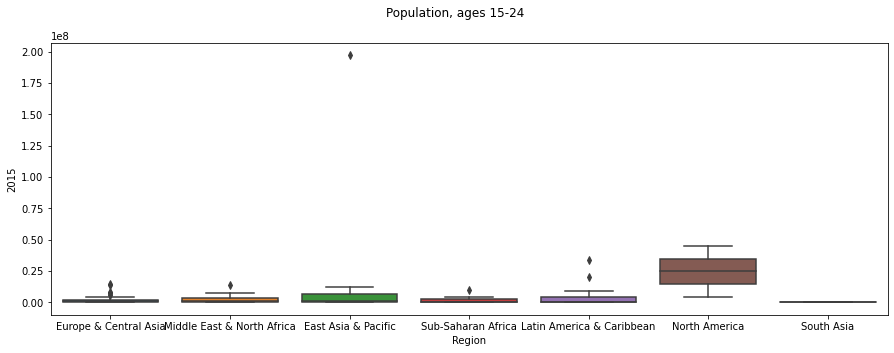

In [429]:

rcParams['figure.figsize'] = 15, 5
ax = sns.boxplot(x="Region", y="2015", data=data_pop_15_24)

plt.suptitle("Population, ages 15-24")

In [25]:
data_pop_tertiary_edu= data_r_pop.loc[(data_r_pop['Indicator Code']== "SP.TER.TOTL.IN")]

Text(0.5, 0.98, 'School age population')

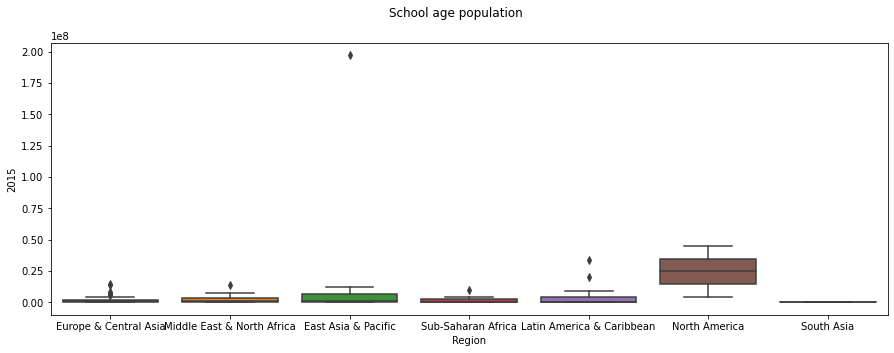

In [390]:
rcParams['figure.figsize'] = 15, 5
ax = sns.boxplot(x="Region", y="2015", data=data_pop_15_24)

plt.suptitle("School age population")

In [419]:
data_Internet['Country_Name']

107660          Andorra
144310          Bahrain
169965          Bermuda
283580          Denmark
323895    Faroe Islands
408190          Iceland
503480    Liechtenstein
510810       Luxembourg
565785           Monaco
624425           Norway
Name: Country_Name, dtype: object

In [420]:
data_pop_tot['Country_Name']

189448                Brazil
240758                 China
445998                 Japan
555948                Mexico
676893    Russian Federation
845483         United States
Name: Country_Name, dtype: object

- Population, ages 15-24, total(SP.POP.1524.TO.UN)   
- School age population, tertiary education, both sexes (number)(SP.TER.TOTL.IN)

In [343]:
data_population = data_r_pop.loc[(data_r_pop['Indicator Code'] == "SP.POP.1524.TO.UN")|
                                  (data_r_pop['Indicator Code'] == "SP.POP.TOTL")|
                                  (data_r_pop['Indicator Code'] == "SP.TER.TOTL.IN")] 


In [346]:
data_pop_tot= data_r_pop.loc[(data_r_pop['Indicator Code']== "SP.POP.TOTL")]

### Education

__Interesting indicator__

- Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary(BAR.TER.CMPT.15UP.ZS)
- 	Enrolment in tertiary education, all programmes, both sexes (number)(SE.TER.ENRL)


In [27]:
codes_to_keep = ['BAR.TER.CMPT.15UP.ZS', 
                 'SE.TER.ENRL']
data_r_edu = data_r_income[data_r_income['Indicator Code'].isin(codes_to_keep)]
data_r_edu.head()

,Region,Country Name,Country Code,Income_group,Indicator Name,Indicator Code,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
95669,Europe & Central Asia,Albania,ALB,Upper middle income,Barro-Lee: Percentage of population age 15+ wi...,BAR.TER.CMPT.15UP.ZS,3.51,NaN,NaN,NaN,...,NaN,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96494,Europe & Central Asia,Albania,ALB,Upper middle income,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,40125.00,40859.0,42160.0,43600.0,...,93139.0,122326.00,134877.0,160839.0,173029.0,173819.0,160527.0,NaN,NaN,NaN
99334,Middle East & North Africa,Algeria,DZA,Upper middle income,Barro-Lee: Percentage of population age 15+ wi...,BAR.TER.CMPT.15UP.ZS,3.40,NaN,NaN,NaN,...,NaN,6.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100159,Middle East & North Africa,Algeria,DZA,Upper middle income,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,549009.0,624788.0,682775.0,...,1149666.0,1144271.00,1188562.0,1210272.0,1252579.0,1245478.0,1289474.0,NaN,NaN,NaN
102999,East Asia & Pacific,American Samoa,ASM,Upper middle income,Barro-Lee: Percentage of population age 15+ wi...,BAR.TER.CMPT.15UP.ZS,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
data_edu_percent_plus_15 = data_r_edu.loc[(data_r_edu['Indicator Code'] == "BAR.TER.CMPT.15UP.ZS")]

In [29]:
data_edu_Enrol_tertiary= data_r_edu.loc[(data_r_edu['Indicator Code'] == "SE.TER.ENRL")]

In [30]:
data_education = data_edu_percent_plus_15.append(data_edu_Enrol_tertiary)


### Expenditures on education

__Interesting indicator__


- 	Government expenditure on education as % of GDP (%)(SE.XPD.TOTL.GD.ZS)
- GDP per capita, PPP (current international dollar)(NY.GDP.PCAP.PP.CD)


In [31]:
codes_to_keep = ['SE.XPD.TOTL.GD.ZS', 
                 'NY.GDP.PCAP.PP.CD']
data_r_exp = data_r_income[data_r_income['Indicator Code'].isin(codes_to_keep)]
data_r_exp.head()

,Region,Country Name,Country Code,Income_group,Indicator Name,Indicator Code,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
96537,Europe & Central Asia,Albania,ALB,Upper middle income,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,4026.537422,4463.632986,4754.675856,5114.784779,...,8823.802984,9646.615727,10207.700674,10526.248328,10580.511504,11332.506541,11449.094589,11865.501400,NaN,NaN
96550,Europe & Central Asia,Albania,ALB,Upper middle income,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,3.287190,3.342710,3.055220,3.064700,...,NaN,NaN,NaN,NaN,3.539440,NaN,NaN,NaN,NaN,NaN
100202,Middle East & North Africa,Algeria,DZA,Upper middle income,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,8093.530893,8416.752682,8911.680680,9621.160947,...,12242.178137,12610.248054,12990.345016,13404.411784,13715.743579,14203.292233,14643.343064,15042.442301,NaN,NaN
100215,Middle East & North Africa,Algeria,DZA,Upper middle income,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103867,East Asia & Pacific,American Samoa,ASM,Upper middle income,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
data_r_exp.groupby('Indicator Code').count()

,Region,Country Name,Country Code,Income_group,Indicator Name,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Indicator Code,,,,,,,,,,,,,,,,,,,,,
NY.GDP.PCAP.PP.CD,130,130,130,130,130,109,110,110,110,110,...,110,110,112,109,109,107,106,104,0,0
SE.XPD.TOTL.GD.ZS,130,130,130,130,130,72,73,81,74,77,...,74,73,70,64,69,53,22,1,0,0


In [33]:
data_exp_Gov= data_r_exp.loc[(data_r_exp['Indicator Code'] == "SE.XPD.TOTL.GD.ZS")]

In [34]:
data_exp_GDP = data_r_exp.loc[(data_r_exp['Indicator Code'] == "NY.GDP.PCAP.PP.CD")]

In [35]:
data_expenditure = data_exp_Gov.append(data_exp_GDP)


__Missing values for Population, ages 15-24, total__

In [67]:
features_with_na=[features for features in data_pop_15_24.columns if data_pop_15_24[features].isnull().sum()>1]

## print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(data_pop_15_24[feature].isnull().mean(),2),  ' % missing values')

2000 0.17  % missing values
2001 0.16  % missing values
2002 0.15  % missing values
2003 0.15  % missing values
2004 0.16  % missing values
2005 0.16  % missing values
2006 0.19  % missing values
2007 0.23  % missing values
2008 0.23  % missing values
2009 0.23  % missing values
2010 0.23  % missing values
2011 0.23  % missing values
2012 0.23  % missing values
2013 0.23  % missing values
2014 0.23  % missing values
2015 0.23  % missing values
2016 1.0  % missing values
2017 1.0  % missing values
2020 1.0  % missing values


In [68]:
data_pop_15_24 = data_pop_15_24.drop(['2020','2017','2016'], axis = 1)

In [69]:
data_pop_15_24.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,1.080000e+02,1.090000e+02,1.100000e+02,1.100000e+02,1.090000e+02,1.090000e+02,1.050000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,4.979016e+06,4.969411e+06,4.978935e+06,5.042655e+06,5.148403e+06,5.192727e+06,5.417437e+06,5.698933e+06,5.692094e+06,5.668831e+06,5.630795e+06,5.577061e+06,5.508471e+06,5.430945e+06,5.352382e+06,5.278861e+06
std,1.975293e+07,1.983046e+07,2.010910e+07,2.058790e+07,2.115028e+07,2.152220e+07,2.215772e+07,2.281584e+07,2.283590e+07,2.274533e+07,2.255449e+07,2.225372e+07,2.184571e+07,2.137079e+07,2.088331e+07,2.042427e+07
min,2.724000e+03,2.778000e+03,2.833000e+03,2.892000e+03,2.948000e+03,2.732000e+03,2.825000e+03,1.329800e+04,1.326000e+04,1.323600e+04,1.329900e+04,1.346600e+04,1.370800e+04,1.399000e+04,1.425300e+04,1.445500e+04
25%,1.509658e+05,1.134210e+05,1.124012e+05,1.149590e+05,1.190400e+05,1.210730e+05,2.083170e+05,3.105350e+05,3.098018e+05,3.083668e+05,3.060598e+05,3.014435e+05,2.944808e+05,2.850842e+05,2.750855e+05,2.656585e+05
50%,7.214435e+05,6.965560e+05,6.813295e+05,6.832960e+05,7.156110e+05,7.214750e+05,8.682960e+05,9.605210e+05,9.516790e+05,9.405975e+05,9.271015e+05,9.215655e+05,9.217190e+05,9.199270e+05,9.154505e+05,9.078725e+05
75%,2.931230e+06,2.818589e+06,2.883195e+06,2.975929e+06,3.120154e+06,3.227067e+06,3.336494e+06,4.466077e+06,4.524709e+06,4.544710e+06,4.524850e+06,4.498272e+06,4.438266e+06,4.382048e+06,4.338085e+06,4.307685e+06
max,1.977468e+08,1.993364e+08,2.031741e+08,2.083041e+08,2.133785e+08,2.173828e+08,2.200425e+08,2.215194e+08,2.217747e+08,2.208928e+08,2.189740e+08,2.159144e+08,2.117359e+08,2.068465e+08,2.018025e+08,1.970268e+08


In [70]:
data_pop_15_24['2000'] = data_pop_15_24['2000'].fillna(data_pop_15_24['2000'].median())
data_pop_15_24['2001'] = data_pop_15_24['2001'].fillna(data_pop_15_24['2001'].median())
data_pop_15_24['2002'] = data_pop_15_24['2002'].fillna(data_pop_15_24['2002'].median())
data_pop_15_24['2003'] = data_pop_15_24['2003'].fillna(data_pop_15_24['2003'].median())
data_pop_15_24['2004'] = data_pop_15_24['2004'].fillna(data_pop_15_24['2004'].median())
data_pop_15_24['2005'] = data_pop_15_24['2005'].fillna(data_pop_15_24['2005'].median())
data_pop_15_24['2006'] = data_pop_15_24['2006'].fillna(data_pop_15_24['2006'].median())
data_pop_15_24['2007'] = data_pop_15_24['2007'].fillna(data_pop_15_24['2007'].median())
data_pop_15_24['2008'] = data_pop_15_24['2008'].fillna(data_pop_15_24['2008'].median())
data_pop_15_24['2009'] = data_pop_15_24['2009'].fillna(data_pop_15_24['2009'].median())

data_pop_15_24['2010'] = data_pop_15_24['2010'].fillna(data_pop_15_24['2010'].median())
data_pop_15_24['2011'] = data_pop_15_24['2011'].fillna(data_pop_15_24['2011'].median())
data_pop_15_24['2012'] = data_pop_15_24['2012'].fillna(data_pop_15_24['2012'].median())
data_pop_15_24['2013'] = data_pop_15_24['2013'].fillna(data_pop_15_24['2013'].median())
data_pop_15_24['2014'] = data_pop_15_24['2014'].fillna(data_pop_15_24['2014'].median())
data_pop_15_24['2015'] = data_pop_15_24['2015'].fillna(data_pop_15_24['2015'].median())


In [71]:
data_pop_15_24.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 97772 to 867422
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          130 non-null    object 
 1   Country Name    130 non-null    object 
 2   Country Code    130 non-null    object 
 3   Income_group    130 non-null    object 
 4   Indicator Name  130 non-null    object 
 5   Indicator Code  130 non-null    object 
 6   2000            130 non-null    float64
 7   2001            130 non-null    float64
 8   2002            130 non-null    float64
 9   2003            130 non-null    float64
 10  2004            130 non-null    float64
 11  2005            130 non-null    float64
 12  2006            130 non-null    float64
 13  2007            130 non-null    float64
 14  2008            130 non-null    float64
 15  2009            130 non-null    float64
 16  2010            130 non-null    float64
 17  2011            130 non-null

__To summerize Population, ages 15-24, total__

In [72]:
# Using pivot table
# Choosing 3 years randomely
pivot_data_pop_15_24 = pd.pivot_table(data_pop_15_24, values=['2005','2010','2015'], index=['Country Name','Region'],
                    aggfunc={'2005': np.mean, '2010': np.mean, '2015': np.mean
                            })
pivot_data_pop_15_24

,,2005,2010,2015
Country Name,Region,,,
Albania,Europe & Central Asia,586049.0,608456.0,556269.0
Algeria,Middle East & North Africa,7409807.0,7245764.0,6467818.0
American Samoa,East Asia & Pacific,721475.0,927101.5,907872.5
Andorra,Europe & Central Asia,8464.0,927101.5,907872.5
Angola,Sub-Saharan Africa,3227067.0,3774989.0,4259352.0
...,...,...,...,...
United Kingdom,Europe & Central Asia,7841484.0,8035314.0,7731522.0
United States,North America,42759049.0,45137089.0,45147517.0
Uruguay,Latin America & Caribbean,497149.0,515960.0,519298.0


In [73]:
pivot_data_pop_15_24.sort_values(by=['2005','2010','2015'], inplace=True,ascending=False)
pivot_data_pop_15_24.head(5)

,,2005,2010,2015
Country Name,Region,,,
China,East Asia & Pacific,217382824.0,218974009.0,197026759.0
United States,North America,42759049.0,45137089.0,45147517.0
Brazil,Latin America & Caribbean,35348374.0,33736994.0,33595574.0
Russian Federation,Europe & Central Asia,24530120.0,20196327.0,14661984.0
Mexico,Latin America & Caribbean,19004782.0,19877068.0,20336734.0


In [74]:
pivot_data_pop_15_24.sort_values(by=['2010','2005','2015'], inplace=True,ascending=False)
pivot_data_pop_15_24.head(5)

,,2005,2010,2015
Country Name,Region,,,
China,East Asia & Pacific,217382824.0,218974009.0,197026759.0
United States,North America,42759049.0,45137089.0,45147517.0
Brazil,Latin America & Caribbean,35348374.0,33736994.0,33595574.0
Russian Federation,Europe & Central Asia,24530120.0,20196327.0,14661984.0
Mexico,Latin America & Caribbean,19004782.0,19877068.0,20336734.0


In [75]:
pivot_data_pop_15_24.sort_values(by=['2015','2010','2005'], inplace=True,ascending=False)
pivot_data_pop_15_24.head(5)

,,2005,2010,2015
Country Name,Region,,,
China,East Asia & Pacific,217382824.0,218974009.0,197026759.0
United States,North America,42759049.0,45137089.0,45147517.0
Brazil,Latin America & Caribbean,35348374.0,33736994.0,33595574.0
Mexico,Latin America & Caribbean,19004782.0,19877068.0,20336734.0
Russian Federation,Europe & Central Asia,24530120.0,20196327.0,14661984.0


The countries with highest population:

'China', 'United States', 'Brazil', 'Russian Federation','Mexico'


__Rename__

In [76]:
data_pop_15_24= data_pop_15_24.rename({"Country Name": "Country_Name"},axis=1)


In [77]:
contries_to_keep = ['China', 'United States', 'Brazil', 'Russian Federation','Mexico']

data_pop_15_24 = data_pop_15_24[data_pop_15_24.Country_Name.isin(contries_to_keep)]

data_pop_15_24.head()

,Region,Country_Name,Country Code,Income_group,Indicator Name,Indicator Code,2000,2001,2002,2003,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
189397,Latin America & Caribbean,Brazil,BRA,Upper middle income,"Population, ages 15-24, total",SP.POP.1524.TO.UN,34632864.0,35019805.0,35287264.0,35430181.0,...,35122910.0,34787085.0,34397361.0,34028600.0,33736994.0,33540594.0,33432501.0,33412052.0,33469835.0,33595574.0
240707,East Asia & Pacific,China,CHN,Upper middle income,"Population, ages 15-24, total",SP.POP.1524.TO.UN,197746762.0,199336400.0,203174053.0,208304084.0,...,220042486.0,221519350.0,221774704.0,220892800.0,218974009.0,215914397.0,211735888.0,206846521.0,201802535.0,197026759.0
555897,Latin America & Caribbean,Mexico,MEX,Upper middle income,"Population, ages 15-24, total",SP.POP.1524.TO.UN,20063287.0,19882910.0,19620290.0,19336000.0,...,19038075.0,19190817.0,19421295.0,19666035.0,19877068.0,20044489.0,20177898.0,20271973.0,20325060.0,20336734.0
676842,Europe & Central Asia,Russian Federation,RUS,High income: nonOECD,"Population, ages 15-24, total",SP.POP.1524.TO.UN,23392286.0,23828843.0,24249593.0,24572351.0,...,24071147.0,23346553.0,22408417.0,21335556.0,20196327.0,18999436.0,17759876.0,16560947.0,15504104.0,14661984.0
845432,North America,United States,USA,High income: OECD,"Population, ages 15-24, total",SP.POP.1524.TO.UN,39234056.0,39908939.0,40626820.0,41361164.0,...,43388523.0,43962362.0,44459126.0,44855382.0,45137089.0,45296141.0,45343097.0,45307415.0,45230846.0,45147517.0


In [78]:
data_pop_15_24= data_pop_15_24.drop(['Region','Country Code','Indicator Code','Indicator Name','Income_group'],
                                    axis = 1)


In [256]:
data_pop_15_24

,Country_Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
189397,Brazil,34632864.0,35019805.0,35287264.0,35430181.0,35448500.0,35348374.0,35122910.0,34787085.0,34397361.0,34028600.0,33736994.0,33540594.0,33432501.0,33412052.0,33469835.0,33595574.0
240707,China,197746762.0,199336400.0,203174053.0,208304084.0,213378536.0,217382824.0,220042486.0,221519350.0,221774704.0,220892800.0,218974009.0,215914397.0,211735888.0,206846521.0,201802535.0,197026759.0
555897,Mexico,20063287.0,19882910.0,19620290.0,19336000.0,19111807.0,19004782.0,19038075.0,19190817.0,19421295.0,19666035.0,19877068.0,20044489.0,20177898.0,20271973.0,20325060.0,20336734.0
676842,Russian Federation,23392286.0,23828843.0,24249593.0,24572351.0,24690145.0,24530120.0,24071147.0,23346553.0,22408417.0,21335556.0,20196327.0,18999436.0,17759876.0,16560947.0,15504104.0,14661984.0
845432,United States,39234056.0,39908939.0,40626820.0,41361164.0,42080588.0,42759049.0,43388523.0,43962362.0,44459126.0,44855382.0,45137089.0,45296141.0,45343097.0,45307415.0,45230846.0,45147517.0


In [258]:
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
data_pop_15_24.box.plot(x = '2015', y = 'Country_Name')

AttributeError: 'DataFrame' object has no attribute 'box'

<AxesSubplot:title={'center':'2000'}, xlabel='Country_Name'>

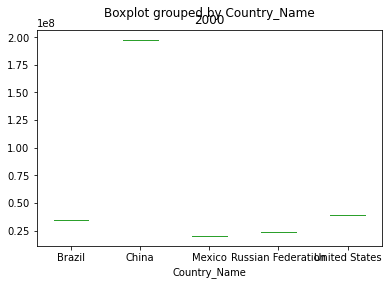

In [82]:
data_pop_15_24.boxplot(by ='Country_Name', column =['2000'], grid = False)

__Missing values for School age population(SP.TER.TOTL.IN)__

In [ ]:
features_with_na=[features for features in data_exp_Gov.columns if data_exp_Gov[features].isnull().sum()>1]

## print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(data_exp_Gov[feature].isnull().mean(),2),  ' % missing values')

### Education missing values


In [84]:

features_with_na=[features for features in data_r_edu.columns if data_r_edu[features].isnull().sum()>1]


for feature in features_with_na:
    print(feature, np.round(data_r_edu[feature].isnull().mean(),2),  ' % missing values')

2000 0.38  % missing values
2001 0.7  % missing values
2002 0.68  % missing values
2003 0.67  % missing values
2004 0.69  % missing values
2005 0.37  % missing values
2006 0.69  % missing values
2007 0.69  % missing values
2008 0.67  % missing values
2009 0.69  % missing values
2010 0.35  % missing values
2011 0.68  % missing values
2012 0.67  % missing values
2013 0.67  % missing values
2014 0.69  % missing values
2015 0.72  % missing values
2016 0.99  % missing values
2017 1.0  % missing values
2020 1.0  % missing values


In [85]:
data_r_edu = data_r_edu.drop(['2001', '2002', '2003', '2004', '2006', '2007', '2008', '2009',
        '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2020'], axis=1)

In [86]:
data_r_edu.describe()

,2000,2005,2010
count,1.620000e+02,1.650000e+02,1.690000e+02
mean,4.127027e+05,5.835234e+05,6.633571e+05
std,1.388987e+06,2.277302e+06,2.949288e+06
min,1.600000e-01,2.600000e-01,2.500000e-01
25%,7.000000e+00,8.410000e+00,1.043000e+01
50%,1.810000e+01,2.177000e+01,2.680000e+01
75%,1.868825e+05,2.248730e+05,2.469280e+05
max,1.320288e+07,2.060122e+07,3.104674e+07


In [87]:
data_r_edu['2000'] =data_r_edu['2000'].fillna(data_r_edu['2000'].median())
data_r_edu['2005'] =data_r_edu['2005'].fillna(data_r_edu['2005'].median())
data_r_edu['2010'] =data_r_edu['2010'].fillna(data_r_edu['2010'].median())


### To summarize education Data

In [88]:
pivot_Education = pd.pivot_table(data_r_edu, values=['2000','2005','2010'], index=['Country Name','Region'],
                    aggfunc={'2000': np.mean, '2005': np.mean, '2010': np.mean
                            })
pivot_Education

,,2000,2005,2010
Country Name,Region,,,
Albania,Europe & Central Asia,20064.255,31629.675,6.116346e+04
Algeria,Middle East & North Africa,10.750,396062.390,5.721388e+05
American Samoa,East Asia & Pacific,18.100,21.770,2.680000e+01
Andorra,Europe & Central Asia,18.100,181.885,2.680000e+01
Angola,Sub-Saharan Africa,18.100,24102.885,2.680000e+01
...,...,...,...,...
United Kingdom,Europe & Central Asia,1012075.415,1143777.385,1.239606e+06
United States,North America,6601451.485,8636033.195,1.021387e+07
Uruguay,Latin America & Caribbean,45589.750,55343.835,8.157975e+04


In [179]:
data_r_edu

,Region,Country_Name,Country Code,Income_group,Indicator_Name,Indicator Code,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
97616,Europe & Central Asia,Albania,ALB,Upper middle income,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,257150.0,255769.0,256577.0,259438.0,...,278853.0,274639.0,271544.0,274631.0,276635.0,277193.0,276247.0,NaN,NaN,NaN
97772,Europe & Central Asia,Albania,ALB,Upper middle income,"Population, ages 15-24, total",SP.POP.1524.TO.UN,538251.0,545188.0,554507.0,565217.0,...,609841.0,608456.0,603104.0,594101.0,582411.0,569427.0,556269.0,NaN,NaN,NaN
97823,Europe & Central Asia,Albania,ALB,Upper middle income,"Population, total",SP.POP.TOTL,3089027.0,3060173.0,3051010.0,3039616.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,NaN,NaN
101281,Middle East & North Africa,Algeria,DZA,Upper middle income,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,3437146.0,3527551.0,3617323.0,3696056.0,...,3855518.0,3835387.0,3809177.0,3754955.0,3687770.0,3600292.0,3492401.0,NaN,NaN,NaN
101437,Middle East & North Africa,Algeria,DZA,Upper middle income,"Population, ages 15-24, total",SP.POP.1524.TO.UN,6901569.0,7049439.0,7176450.0,7280112.0,...,7340706.0,7245764.0,7118500.0,6964424.0,6795040.0,6625398.0,6467818.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860092,Latin America & Caribbean,"Venezuela, RB",VEN,Upper middle income,"Population, ages 15-24, total",SP.POP.1524.TO.UN,4750343.0,4847035.0,4939009.0,5025233.0,...,5387453.0,5418101.0,5439160.0,5451832.0,5459795.0,5467947.0,5479911.0,NaN,NaN,NaN
860143,Latin America & Caribbean,"Venezuela, RB",VEN,Upper middle income,"Population, total",SP.POP.TOTL,24488340.0,24948476.0,25408700.0,25868523.0,...,28587323.0,29028033.0,29463291.0,29893080.0,30317848.0,30738378.0,31155134.0,31568179.0,NaN,NaN
867266,Latin America & Caribbean,Virgin Islands (U.S.),VIR,High income: nonOECD,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
867422,Latin America & Caribbean,Virgin Islands (U.S.),VIR,High income: nonOECD,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd

In [ ]:
plotPerColumnDistribution(df2, 10, 5)

In [ ]:
data_r_edu.plot(x="Region", y=["P25th", "Median", "P75th"])
plt.show()

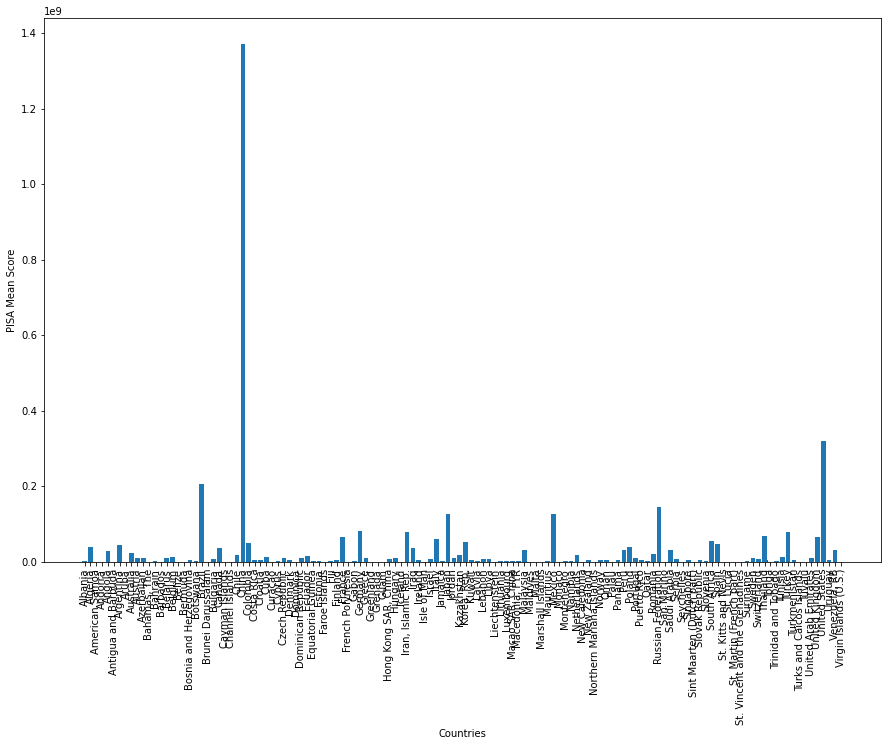

In [188]:
_2015_score = data_r_edu[['Country_Name','2015','Country Code']]
# pisa_data.loc[pisa_data['Country Name']]

countries = data_r_edu['Country_Name']

fig = plt.figure()
fig.set_size_inches(15,10)
plt.xlabel('Countries')
plt.ylabel("PISA Mean Score")
plt.xticks(rotation='vertical')
bar_graph = plt.bar(countries, _2015_score['2015'])


# Let's color Thailand to emphasize how shitty we are doing
# Firstly we have to find the index of Thailand
countries = countries.to_list()
thailand_index = countries.index('Thailand')

bar_graph[thailand_index].set_color('red')

In [182]:
pivotShortlist_2015 = data_r_edu.pivot_table(index=['Population, total'], 
                                                  columns=['Region'], 
                                                  values= '2005')
pivotShortlist_2015.head()

KeyError: 'Population, total'

In [180]:
plt.figure()
sns.boxplot(data=data_r_edu.reset_index(), x="Population, total", y="2000")

plt.suptitle("Population, ages 15-64", size=14, y=1)
plt.show()
plt.savefig('Box_population.png')

ValueError: Could not interpret input 'Population, total'

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure()
sns.boxplot(data=pivotShortlist_2015.reset_index(), y="Population, total", x="Country_Name")

plt.suptitle("Population, ages 15-64", size=14, y=1)
plt.show()
plt.savefig('Box_population.png')

__Sorting the values for each year to find the countries with the highest Education__

In [89]:
pivot_Education.sort_values(by=['2000','2005','2010'], inplace=True,ascending=False)
pivot_Education.head(5)

,,2000,2005,2010
Country Name,Region,,,
United States,North America,6601451.485,8.636033e+06,1.021387e+07
China,East Asia & Pacific,3682056.875,1.030061e+07,1.552337e+07
Russian Federation,Europe & Central Asia,3165671.655,4.501615e+06,2.577000e+01
Japan,East Asia & Pacific,1991042.575,2.019160e+06,1.918166e+06
"Korea, Rep.",East Asia & Pacific,1501758.540,1.605103e+06,1.634770e+06


In [90]:
pivot_Education.sort_values(by=['2005','2000','2010'], inplace=True,ascending=False)
pivot_Education.head(5)

,,2000,2005,2010
Country Name,Region,,,
China,East Asia & Pacific,3682056.875,1.030061e+07,1.552337e+07
United States,North America,6601451.485,8.636033e+06,1.021387e+07
Russian Federation,Europe & Central Asia,3165671.655,4.501615e+06,2.577000e+01
Brazil,Latin America & Caribbean,1390665.850,2.286150e+06,3.276356e+06
Japan,East Asia & Pacific,1991042.575,2.019160e+06,1.918166e+06


In [91]:
pivot_Education.sort_values(by=['2010','2005','2000'], inplace=True,ascending=False)
pivot_Education.head(10)

,,2000,2005,2010
Country Name,Region,,,
China,East Asia & Pacific,3682056.875,1.030061e+07,1.552337e+07
United States,North America,6601451.485,8.636033e+06,1.021387e+07
Brazil,Latin America & Caribbean,1390665.850,2.286150e+06,3.276356e+06
Japan,East Asia & Pacific,1991042.575,2.019160e+06,1.918166e+06
"Iran, Islamic Rep.",Middle East & North Africa,702444.000,1.063142e+06,1.895437e+06
Turkey,Europe & Central Asia,11.505,1.053178e+06,1.764670e+06
"Korea, Rep.",East Asia & Pacific,1501758.540,1.605103e+06,1.634770e+06
Mexico,Latin America & Caribbean,981384.920,1.192433e+06,1.423693e+06
Argentina,Latin America & Caribbean,883468.050,1.041290e+06,1.260494e+06


The countries with highest population:

__'China', 'United States', 'Brazil', 'Russian Federation','Mexico', 'Japan','Iran, Islamic Rep'__


In [92]:
data_r_edu= data_r_pop.rename({"Country Name": "Country_Name",
                              "Indicator Name": "Indicator_Name"
                              },axis=1)
data_r_edu.head()

,Region,Country_Name,Country Code,Income_group,Indicator_Name,Indicator Code,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
97616,Europe & Central Asia,Albania,ALB,Upper middle income,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,257150.0,255769.0,256577.0,259438.0,...,278853.0,274639.0,271544.0,274631.0,276635.0,277193.0,276247.0,NaN,NaN,NaN
97772,Europe & Central Asia,Albania,ALB,Upper middle income,"Population, ages 15-24, total",SP.POP.1524.TO.UN,538251.0,545188.0,554507.0,565217.0,...,609841.0,608456.0,603104.0,594101.0,582411.0,569427.0,556269.0,NaN,NaN,NaN
97823,Europe & Central Asia,Albania,ALB,Upper middle income,"Population, total",SP.POP.TOTL,3089027.0,3060173.0,3051010.0,3039616.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,NaN,NaN
101281,Middle East & North Africa,Algeria,DZA,Upper middle income,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,3437146.0,3527551.0,3617323.0,3696056.0,...,3855518.0,3835387.0,3809177.0,3754955.0,3687770.0,3600292.0,3492401.0,NaN,NaN,NaN
101437,Middle East & North Africa,Algeria,DZA,Upper middle income,"Population, ages 15-24, total",SP.POP.1524.TO.UN,6901569.0,7049439.0,7176450.0,7280112.0,...,7340706.0,7245764.0,7118500.0,6964424.0,6795040.0,6625398.0,6467818.0,NaN,NaN,NaN


__Create new DF with selected countries__

In [171]:
contries_to_keep = ['China', 'United States', 'Brazil', 'Russian Federation','Mexico', 'Japan','Iran, Islamic Rep']

New_data_Education = data_r_edu[data_r_edu.Country_Name.isin(contries_to_keep)]

New_data_Education.head()

,Region,Country_Name,Country Code,Income_group,Indicator_Name,Indicator Code,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
189241,Latin America & Caribbean,Brazil,BRA,Upper middle income,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,NaN,17217676.0,17308476.0,17204732.0,...,16510265.0,NaN,15944204.0,16006990.0,16236096.0,16380221.0,16372865.0,NaN,NaN,NaN
189397,Latin America & Caribbean,Brazil,BRA,Upper middle income,"Population, ages 15-24, total",SP.POP.1524.TO.UN,34632864.0,35019805.0,35287264.0,35430181.0,...,34028600.0,33736994.0,33540594.0,33432501.0,33412052.0,33469835.0,33595574.0,NaN,NaN,NaN
189448,Latin America & Caribbean,Brazil,BRA,Upper middle income,"Population, total",SP.POP.TOTL,175287587.0,177750670.0,180151021.0,182482149.0,...,194895996.0,196796269.0,198686688.0,200560983.0,202408632.0,204213133.0,205962108.0,207652865.0,NaN,NaN
240551,East Asia & Pacific,China,CHN,Upper middle income,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,95384152.0,94445688.0,94939320.0,97124688.0,...,130111424.0,129642728.0,125873928.0,119869952.0,113027008.0,106432544.0,99943816.0,NaN,NaN,NaN
240707,East Asia & Pacific,China,CHN,Upper middle income,"Population, ages 15-24, total",SP.POP.1524.TO.UN,197746762.0,199336400.0,203174053.0,208304084.0,...,220892800.0,218974009.0,215914397.0,211735888.0,206846521.0,201802535.0,197026759.0,NaN,NaN,NaN


In [172]:
New_data_Education.shape

(18, 25)

In [ ]:
sns.boxplot(data=pivot_plus_country, x="IT.NET.USER.P2", y="Region")

<AxesSubplot:xlabel='2007', ylabel='Country_Name'>

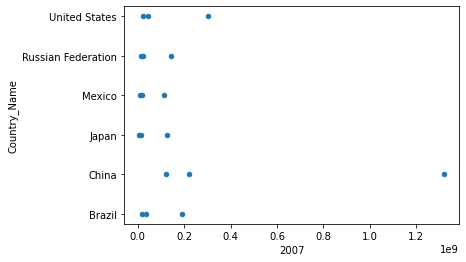

In [95]:
New_data_Education.plot.scatter(y='Country_Name',x='2007')

In [162]:
pivotShortlist_2015 = New_data_Education.pivot_table(index=['Country_Name'], 
                                                  columns=['Indicator_Name'], 
                                                  values= '2005')
pivotShortlist_2015.head()


Indicator_Name,"Population of the official age for tertiary education, both sexes (number)","Population, ages 15-24, total","Population, total"
Country_Name,,,
Brazil,17592776.0,35348374.0,1.869174e+08
China,106544088.0,217382824.0,1.303720e+09
Japan,7346245.0,14110659.0,1.277730e+08
Mexico,10314980.0,19004782.0,1.084722e+08
Russian Federation,12399505.0,24530120.0,1.435185e+08


In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=data_all.reset_index(), palette="RdBu_r")

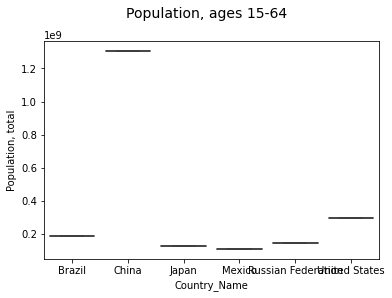

<Figure size 432x288 with 0 Axes>

In [170]:
plt.figure()
sns.boxplot(data=pivotShortlist_2015.reset_index(), y="Population, total", x="Country_Name")

plt.suptitle("Population, ages 15-64", size=14, y=1)
plt.show()
plt.savefig('Box_population.png')

In [145]:
plt.figure()
sns.boxplot(data=pivotShortlist_2015, x="Country_Name", y="Indicator_Name")
plt.suptitle("Internet users (%)", size=10, y=3)
plt.show()
plt.savefig('Box_internetusers.png')

ValueError: Could not interpret input 'Country_Name'

<Figure size 432x288 with 0 Axes>

In [132]:

pivotShortlist_2015 = pivotShortlist_2015.round({'Population, total': 10})
pivotShortlist_2015.head()

Indicator_Name,"Population of the official age for tertiary education, both sexes (number)","Population, ages 15-24, total","Population, total"
Country_Name,,,
Brazil,17592776.0,35348374.0,1.869174e+08
China,106544088.0,217382824.0,1.303720e+09
Japan,7346245.0,14110659.0,1.277730e+08
Mexico,10314980.0,19004782.0,1.084722e+08
Russian Federation,12399505.0,24530120.0,1.435185e+08


### Expenditures on education Data missing values


In [240]:
#  features with the missing values
features_with_na=[features for features in data_r_exp.columns if data_r_exp[features].isnull().sum()>1]

## print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(data_r_exp[feature].isnull().mean(),2),  ' % missing values')

Keeping  years from 2000 to 2013

In [241]:
data_r_exp = data_r_exp.drop(['2017','2020','2016','2015','2014'], axis=1)

KeyError: "['2017' '2020' '2016' '2015' '2014'] not found in axis"

In [ ]:
data_r_exp.describe()

In [ ]:
data_r_exp.columns

Filling missing values by their median

In [ ]:
data_exp_Gov['2000'] = data_exp_Gov['2000'].fillna(data_exp_Gov['2000'].median())
data_exp_Gov['2001'] = data_exp_Gov['2001'].fillna(data_exp_Gov['2001'].median())
data_exp_Gov['2002'] = data_exp_Gov['2002'].fillna(data_exp_Gov['2002'].median())
data_exp_Gov['2003'] = data_exp_Gov['2003'].fillna(data_exp_Gov['2003'].median())
data_exp_Gov['2004'] = data_exp_Gov['2004'].fillna(data_exp_Gov['2004'].median())
data_exp_Gov['2005'] = data_exp_Gov['2005'].fillna(data_exp_Gov['2005'].median())
data_exp_Gov['2006'] = data_exp_Gov['2006'].fillna(data_exp_Gov['2006'].mean())
data_exp_Gov['2007'] = data_exp_Gov['2007'].fillna(data_exp_Gov['2007'].median())
data_exp_Gov['2008'] = data_exp_Gov['2008'].fillna(data_exp_Gov['2008'].median())
data_exp_Gov['2009'] = data_exp_Gov['2009'].fillna(data_exp_Gov['2009'].median())

data_exp_Gov['2010'] = data_exp_Gov['2010'].fillna(data_exp_Gov['2010'].median())
data_exp_Gov['2011'] = data_exp_Gov['2011'].fillna(data_exp_Gov['2011'].median())
data_exp_Gov['2012'] = data_exp_Gov['2012'].fillna(data_exp_Gov['2012'].median())
data_exp_Gov['2013'] = data_exp_Gov['2013'].fillna(data_exp_Gov['2013'].median())

In [67]:
data_r_exp['2000']= data_r_exp['2000'].fillna(data_r_exp['2000'].median())
data_r_exp['2001']= data_r_exp['2001'].fillna(data_r_exp['2001'].median())
data_r_exp['2002']= data_r_exp['2002'].fillna(data_r_exp['2002'].median())
data_r_exp['2003']= data_r_exp['2003'].fillna(data_r_exp['2003'].median())
data_r_exp['2004']= data_r_exp['2004'].fillna(data_r_exp['2004'].median())
data_r_exp['2005']= data_r_exp['2005'].fillna(data_r_exp['2005'].median())
data_r_exp['2006']= data_r_exp['2006'].fillna(data_r_exp['2006'].median())
data_r_exp['2007']= data_r_exp['2007'].fillna(data_r_exp['2007'].median())
data_r_exp['2008']= data_r_exp['2008'].fillna(data_r_exp['2008'].median())
data_r_exp['2009']= data_r_exp['2009'].fillna(data_r_exp['2009'].median())
data_r_exp['2010']= data_r_exp['2010'].fillna(data_r_exp['2010'].median())
data_r_exp['2011']= data_r_exp['2011'].fillna(data_r_exp['2011'].median())
data_r_exp['2012']= data_r_exp['2012'].fillna(data_r_exp['2012'].median())
data_r_exp['2013']= data_r_exp['2013'].fillna(data_r_exp['2013'].median())

In [96]:
data_r_exp.isnull().sum().sort_values(ascending=False).head()

2013            0
2012            0
Country_Name    0
Country Code    0
Income_group    0
dtype: int64

### To summarize Expenditures on education Data

In [249]:
data_r_exp= data_r_exp.rename({"Country Name": "Country_Name",
                              "Indicator Name": "Indicator_Name"
                              },axis=1)
data_r_exp.head()

,Region,Country_Name,Country Code,Income_group,Indicator_Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
95803,Europe & Central Asia,Albania,ALB,Upper middle income,Capital expenditure as % of total expenditure ...,UIS.XSPENDP.FDPUB.FNCAP,14.260890,14.264550,12.682530,14.215870,12.847390,13.376390,13.190845,13.041040,13.609015,13.046750,12.934240,12.976565,15.295890,8.586840
96514,Europe & Central Asia,Albania,ALB,Upper middle income,Expenditure on education as % of total governm...,SE.XPD.TOTL.GB.ZS,10.137030,10.581930,9.886920,10.573600,10.703160,11.357970,10.932950,11.177190,13.609015,13.046750,12.934240,12.976565,15.295890,12.123910
96537,Europe & Central Asia,Albania,ALB,Upper middle income,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,4026.537422,4463.632986,4754.675856,5114.784779,5524.921661,5942.870083,6634.779222,7289.632366,8228.357428,8823.802984,9646.615727,10207.700674,10526.248328,10580.511504
96550,Europe & Central Asia,Albania,ALB,Upper middle income,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,3.287190,3.342710,3.055220,3.064700,3.170170,3.237910,3.157940,3.267560,13.609015,13.046750,12.934240,12.976565,15.295890,3.539440
99468,Middle East & North Africa,Algeria,DZA,Upper middle income,Capital expenditure as % of total expenditure ...,UIS.XSPENDP.FDPUB.FNCAP,14.260890,14.264550,12.682530,14.215870,12.847390,13.376390,13.190845,13.041040,13.609015,13.046750,12.934240,12.976565,15.295890,15.262420


In [250]:
pivot_Expenditures = pd.pivot_table(data_r_exp, values=['2005','2010','2013'], index=['Country_Name','Region'],
                    aggfunc={'2005': np.mean, '2010': np.mean, '2013': np.mean
                            })
pivot_Expenditures

,,2005,2010,2013
Country_Name,Region,,,
Albania,Europe & Central Asia,1492.710588,2421.354612,2651.190424
Algeria,Middle East & North Africa,2752.994010,3162.262694,3440.382709
American Samoa,East Asia & Pacific,13.376390,12.934240,15.262420
Andorra,Europe & Central Asia,10.432355,7.654370,8.392440
Angola,Sub-Saharan Africa,885.137132,1450.239813,1611.615159
...,...,...,...,...
United Kingdom,Europe & Central Asia,8115.764535,8984.992780,9832.343152
United States,North America,11084.850486,12100.612256,13205.126465
Uruguay,Latin America & Caribbean,2892.604418,4193.913438,4997.072827


__Sorting the values for each year to find the countries with the highest Expenditures__

In [99]:
pivot_Expenditures.sort_values(by=['2005','2010','2013'], inplace=True,ascending=False)
pivot_Expenditures.head(5)

,,2005,2010,2013
Country_Name,Region,,,
Qatar,Middle East & North Africa,24449.566666,30660.175442,31736.379805
Kuwait,Middle East & North Africa,20812.725545,18430.417775,19178.373398
United Arab Emirates,Middle East & North Africa,20561.518610,14113.469193,16189.729616
San Marino,Europe & Central Asia,18619.245027,18098.557132,14952.473388
Brunei Darussalam,East Asia & Pacific,18478.354853,19735.915716,20468.265180


In [196]:
pivot_Expenditures.sort_values(by=['2010','2005','2013'], inplace=True,ascending=False)
pivot_Expenditures.head(5)

,,2005,2010,2013
Country_Name,Region,,,
Qatar,Middle East & North Africa,24449.566666,30660.175442,31736.379805
"Macao SAR, China",East Asia & Pacific,14297.196535,24064.456618,35020.572671
Luxembourg,Europe & Central Asia,17065.048413,21454.471281,23909.081489
Brunei Darussalam,East Asia & Pacific,18478.354853,19735.915716,20468.265180
Kuwait,Middle East & North Africa,20812.725545,18430.417775,19178.373398


In [251]:
pivot_Expenditures.sort_values(by=['2013','2010','2005'], inplace=True,ascending=False)
pivot_Expenditures.head(10)

,,2005,2010,2013
Country_Name,Region,,,
"Macao SAR, China",East Asia & Pacific,14297.196535,24064.456618,35020.572671
Qatar,Middle East & North Africa,24449.566666,30660.175442,31736.379805
Luxembourg,Europe & Central Asia,17065.048413,21454.471281,23909.081489
Brunei Darussalam,East Asia & Pacific,18478.354853,19735.915716,20468.265180
Singapore,East Asia & Pacific,13802.334171,17669.074624,20329.729396
Kuwait,Middle East & North Africa,20812.725545,18430.417775,19178.373398
Norway,Europe & Central Asia,11951.675859,14527.739317,16773.944717
United Arab Emirates,Middle East & North Africa,20561.518610,14113.469193,16189.729616
Switzerland,Europe & Central Asia,10150.630744,13299.807695,15036.060542


The countries with highest Expenditures:

__'Macao SAR, China', 'Qatar', 'Brunei Darussalam', 'United Arab Emirates','Luxembourg', 'Kuwait'__

In [ ]:
New_data_Expenditures

__Create new DF with selected countries__

In [252]:
contries_to_keep = ['Macao SAR, China', 'Qatar', 'Brunei Darussalam', 'United Arab Emirates','Luxembourg', 'Kuwait']

New_data_Expenditures = data_r_exp[data_r_exp.Country_Name.isin(contries_to_keep)]

New_data_Expenditures.head()

,Region,Country_Name,Country Code,Income_group,Indicator_Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
191093,East Asia & Pacific,Brunei Darussalam,BRN,High income: nonOECD,Capital expenditure as % of total expenditure ...,UIS.XSPENDP.FDPUB.FNCAP,14.260890,14.264550,12.682530,14.215870,12.847390,13.37639,13.190845,13.041040,13.609015,13.046750,12.934240,12.976565,15.295890,15.262420
191804,East Asia & Pacific,Brunei Darussalam,BRN,High income: nonOECD,Expenditure on education as % of total governm...,SE.XPD.TOTL.GB.ZS,8.920740,14.264550,12.682530,14.215870,12.847390,13.37639,13.190845,13.041040,13.609015,13.046750,5.291540,9.182190,9.727820,15.262420
191827,East Asia & Pacific,Brunei Darussalam,BRN,High income: nonOECD,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,65034.834659,66960.520817,69246.748177,71337.235205,72411.575283,73873.29024,78398.189657,79616.870305,78682.980825,76964.317772,78923.390474,82434.883091,83504.302518,81827.273461
191840,East Asia & Pacific,Brunei Darussalam,BRN,High income: nonOECD,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,3.705910,14.264550,12.682530,14.215870,12.847390,13.37639,13.190845,13.041040,13.609015,13.046750,2.046610,3.322100,2.889590,15.262420
473298,Middle East & North Africa,Kuwait,KWT,High income: nonOECD,Capital expenditure as % of total expenditure ...,UIS.XSPENDP.FDPUB.FNCAP,14.260890,14.264550,6.438940,14.215870,12.847390,7.73494,13.190845,13.041040,13.609015,13.046750,12.934240,12.976565,15.295890,15.262420


In [244]:
New_data_Expenditures.shape

(24, 20)

In [253]:
New_data_Expenditures['Expenditures_on_education']=pd.factorize(New_data_Expenditures.Indicator_Name)[0]

<ipython-input-253-a5c2e31018d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_data_Expenditures['Expenditures_on_education']=pd.factorize(New_data_Expenditures.Indicator_Name)[0]


In [262]:
New_data_Expenditures.head()

,Region,Country_Name,Country Code,Income_group,Indicator_Name,Indicator Code,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Expenditures_on_education
191093,East Asia & Pacific,Brunei Darussalam,BRN,High income: nonOECD,Capital expenditure as % of total expenditure ...,UIS.XSPENDP.FDPUB.FNCAP,14.260890,14.264550,12.682530,14.215870,...,13.37639,13.190845,13.041040,13.609015,13.046750,12.934240,12.976565,15.295890,15.262420,0
191804,East Asia & Pacific,Brunei Darussalam,BRN,High income: nonOECD,Expenditure on education as % of total governm...,SE.XPD.TOTL.GB.ZS,8.920740,14.264550,12.682530,14.215870,...,13.37639,13.190845,13.041040,13.609015,13.046750,5.291540,9.182190,9.727820,15.262420,1
191827,East Asia & Pacific,Brunei Darussalam,BRN,High income: nonOECD,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,65034.834659,66960.520817,69246.748177,71337.235205,...,73873.29024,78398.189657,79616.870305,78682.980825,76964.317772,78923.390474,82434.883091,83504.302518,81827.273461,2
191840,East Asia & Pacific,Brunei Darussalam,BRN,High income: nonOECD,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,3.705910,14.264550,12.682530,14.215870,...,13.37639,13.190845,13.041040,13.609015,13.046750,2.046610,3.322100,2.889590,15.262420,3
473298,Middle East & North Africa,Kuwait,KWT,High income: nonOECD,Capital expenditure as % of total expenditure ...,UIS.XSPENDP.FDPUB.FNCAP,14.260890,14.264550,6.438940,14.215870,...,7.73494,13.190845,13.041040,13.609015,13.046750,12.934240,12.976565,15.295890,15.262420,0


In [264]:
New_data_Expenditures['Indicator_Name'].unique()

array(['Capital expenditure as % of total expenditure in public institutions (%)',
       'Expenditure on education as % of total government expenditure (%)',
       'GDP per capita, PPP (current international $)',
       'Government expenditure on education as % of GDP (%)'],
      dtype=object)

In [269]:
data_Exp_Gov = New_data_Expenditures.filter(items=['Country_Name','Government expenditure on education as % of GDP (%)',
                                                   '2000', '2001', '2002', '2003', '2004', '2005','2006',
                                              '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
                                              '2015', '2016', '2017', '2020'])
data_Exp_Gov.head()

,Country_Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
191093,Brunei Darussalam,14.260890,14.264550,12.682530,14.215870,12.847390,13.37639,13.190845,13.041040,13.609015,13.046750,12.934240,12.976565,15.295890,15.262420
191804,Brunei Darussalam,8.920740,14.264550,12.682530,14.215870,12.847390,13.37639,13.190845,13.041040,13.609015,13.046750,5.291540,9.182190,9.727820,15.262420
191827,Brunei Darussalam,65034.834659,66960.520817,69246.748177,71337.235205,72411.575283,73873.29024,78398.189657,79616.870305,78682.980825,76964.317772,78923.390474,82434.883091,83504.302518,81827.273461
191840,Brunei Darussalam,3.705910,14.264550,12.682530,14.215870,12.847390,13.37639,13.190845,13.041040,13.609015,13.046750,2.046610,3.322100,2.889590,15.262420
473298,Kuwait,14.260890,14.264550,6.438940,14.215870,12.847390,7.73494,13.190845,13.041040,13.609015,13.046750,12.934240,12.976565,15.295890,15.262420


In [ ]:
import matplotlib.pyplot as plt

plt.plot(x, y, label = "line 1")
plt.plot(y, x, label = "line 2")
plt.plot(x, np.sin(x), label = "curve 1")
plt.plot(x, np.cos(x), label = "curve 2")
plt.legend()
plt.show()

C:\Users\azade\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2006', ylabel='Density'>

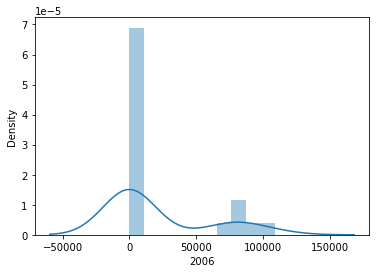

In [270]:
sns.distplot(data_Exp_Gov['2006'])

In [ ]:
X = create_random_walk()
Y = create_random_walk()
Z = create_random_walk()

# Plotting functionality starts here
plt.plot(X)
plt.plot(Y)
plt.plot(Z)
plt.show()

In [260]:
import seaborn as sns

New_data_Expenditures.crosstab(Country_Name, [Indicator_Name, 2000 ,2001 ,2002 ,2003], 
                               rownames=['Country_Name'], colnames=['Indicator_Name', '2000','2001' ,'2002' ,'2003'])

AttributeError: 'DataFrame' object has no attribute 'crosstab'

In [258]:
plt.bar(Expenditures_on_education,Country_Name)
plt.title('title name')
plt.xlabel('xAxis name')
plt.ylabel('Country_Name')
plt.show()

NameError: name 'Expenditures_on_education' is not defined

In [ ]:
# data to plot
n_groups = 4
means_frank = (90, 55, 40, 65)
means_guido = (85, 62, 54, 20)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='b',
label='Frank')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='g',
label='Guido')

plt.xlabel('Person')
plt.ylabel('Scores')
plt.title('Scores by person')
plt.xticks(index + bar_width, ('A', 'B', 'C', 'D'))
plt.legend()

plt.tight_layout()
plt.show()

In [229]:
New_data_Expenditures.groupby('Indicator Name').mean()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Indicator Name,,,,,,,,,,,,,,
Capital expenditure as % of total expenditure in public institutions (%),14.260890,14.806435,11.641932,14.215870,12.847390,12.436149,13.190845,13.041040,13.609015,12.431887,17.702247,20.240568,23.944910,17.168181
Expenditure on education as % of total government expenditure (%),12.606725,12.704205,12.966090,13.211203,12.720184,13.033822,11.966228,12.293505,13.609763,13.222687,12.220772,13.092374,13.860367,15.104281
Government expenditure on education as % of GDP (%),8.982363,7.440387,8.551107,10.505845,8.297595,8.518872,8.041941,9.445697,10.145098,9.691698,8.003150,8.159387,7.410602,11.195526


<AxesSubplot:xlabel='Country_Name', ylabel='2013'>

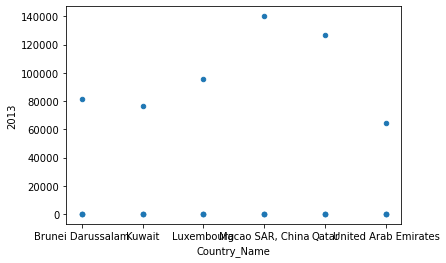

In [214]:
New_data_Expenditures.plot.scatter(x='Country_Name',y='2013')

<AxesSubplot:xlabel='Country_Name', ylabel='2012'>

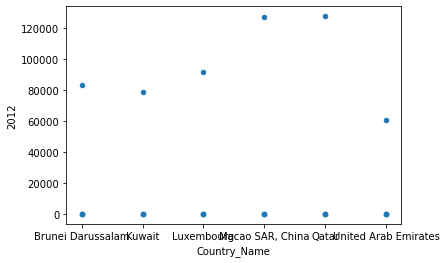

In [215]:
New_data_Expenditures.plot.scatter(x='Country_Name',y='2012')

### Finding outliers

In [174]:
New_data_Expenditures.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,15713.552641,15883.341790,16373.089790,17222.507016,18758.919022,19277.401770,20848.559761,21534.709157,21546.335921,20369.240701,21409.817671,23193.938988,23743.081708,24417.067027
std,29207.137849,29477.319463,30257.223527,31500.028714,34064.168162,34705.308589,37485.918206,38643.300944,38820.567788,36943.870092,39278.727746,42795.223348,43825.661281,45352.561372
min,3.679620,2.734010,2.861990,2.797650,2.245660,2.290640,2.212710,2.059860,2.204760,2.553430,2.046610,2.688360,2.889590,2.049190
25%,14.260890,10.370615,12.632680,14.215870,12.847390,13.376390,13.190845,13.041040,13.609015,13.046750,12.934240,12.976565,11.661478,15.262420
50%,14.260890,14.264550,12.682530,14.215870,12.847390,13.376390,13.190845,13.041040,13.609015,13.046750,12.934240,12.976565,15.295890,15.262420
75%,8377.962390,8615.627820,9297.792365,10327.361419,13125.558542,14301.051637,16336.818624,18684.349375,17236.841403,14801.127200,14134.925222,14643.424333,15279.093278,16198.305543
max,85860.611440,87599.296411,91083.791524,90348.993723,100426.546129,97767.190344,108831.252401,111959.861509,115012.450334,113312.852224,122609.410776,129349.916352,127610.208824,140037.115597


The huge difference between mean and median show us outliers

### Outliers

__To find outliers__

In [216]:
from collections import Counter

In [217]:

indexes = []

for col in New_data_Expenditures.columns[6:]: 
    Q1 = np.percentile(New_data_Expenditures[col], 25) 
    Q3 = np.percentile(New_data_Expenditures[col],75) 
    IQR = Q3 - Q1 
 
    limit = 1.5 * IQR 
 
    list_outliers = New_data_Expenditures[(New_data_Expenditures[col] < Q1 - limit) |
                                          (New_data_Expenditures[col] > Q3 + limit )].index 
    # Determine a list of indices of outliers for feature col 
 
    indexes.extend(list_outliers) # append the found outlier indices for col to the list of outlier indices 
indexes = Counter(indexes) 
multiple_outliers = list( k for k, v in indexes.items() if v > n )

In [221]:
list_outliers

Int64Index([191827, 474032, 510682, 514347, 668277, 836867], dtype='int64')

In [222]:
limit

24274.56468524218

In [223]:
indexes

Counter({191827: 14,
         474032: 14,
         510682: 14,
         514347: 14,
         668277: 14,
         836867: 14})

__To delete outliers__

In [218]:
New_data_Expenditures.drop(multiple_outliers, axis = 0) 
 
New_data_Expenditures= New_data_Expenditures.drop(multiple_outliers, axis = 0).reset_index(drop=True)

<AxesSubplot:xlabel='Country_Name', ylabel='2013'>

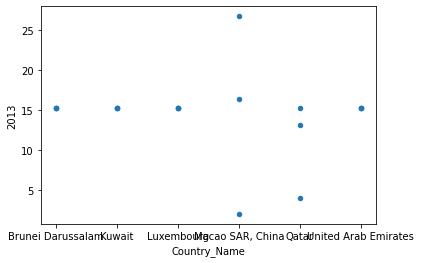

In [219]:
New_data_Expenditures.plot.scatter(x='Country_Name',y='2013')

<AxesSubplot:xlabel='Country_Name', ylabel='2012'>

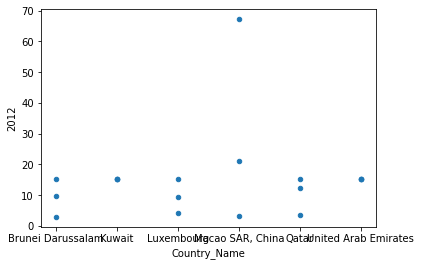

In [220]:
New_data_Expenditures.plot.scatter(x='Country_Name',y='2012')

In [225]:
New_data_Expenditures.shape

(18, 20)

In [209]:
#Setting the min/max to outliers using standard deviation 
for col in New_data_Expenditures.columns[6:]: 
    factor = 3 #The optimal value for this parameter can be later determined though the cross-validation 
    upper_lim = New_data_Expenditures[col].mean () + New_data_Expenditures[col].std () * factor 
    lower_lim = New_data_Expenditures[col].mean () - New_data_Expenditures[col].std () * factor 
 
    New_data_Expenditures = New_data_Expenditures[(New_data_Expenditures[col] < upper_lim) & (New_data_Expenditures[col] > lower_lim)] 

In [210]:
New_data_Expenditures.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,13.850109,12.668581,11.913362,14.022625,12.287296,12.091516,12.198853,13.035583,13.498091,12.990344,12.537022,13.019993,14.005255,15.352150
std,1.481091,4.169972,2.509446,0.696756,2.201009,2.793275,2.730392,0.019675,0.399943,0.203375,2.282258,1.667662,4.135206,0.323526
min,8.920740,3.593020,6.438940,11.703680,5.535150,4.738250,3.760010,12.970100,12.167000,12.313470,5.291540,9.182190,4.140910,15.262420
25%,14.260890,9.828530,12.682530,14.215870,12.847390,13.376390,13.190845,13.041040,13.609015,13.046750,12.934240,12.976565,15.295890,15.262420
50%,14.260890,14.264550,12.682530,14.215870,12.847390,13.376390,13.190845,13.041040,13.609015,13.046750,12.934240,12.976565,15.295890,15.262420
75%,14.260890,14.264550,12.682530,14.215870,12.847390,13.376390,13.190845,13.041040,13.609015,13.046750,12.934240,12.976565,15.295890,15.262420
max,14.260890,18.014179,15.258360,14.215870,14.953610,13.854110,13.370010,13.041040,13.609015,13.046750,15.413100,17.335510,21.243870,16.428909


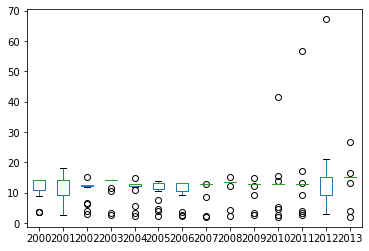

In [226]:
New_data_Expenditures.plot(kind = 'box', sharex = False, sharey = False) 
plt.show()

<AxesSubplot:xlabel='Country_Name', ylabel='2013'>

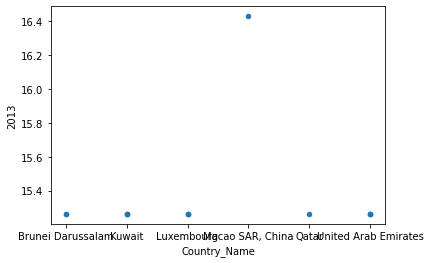

In [212]:
New_data_Expenditures.plot.scatter(x='Country_Name',y='2013')

In [182]:
## Here we will compare the difference between All years feature with SalePrice

for feature in year_feature:
    if feature!='YrSold':
        data=dataset.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['2012'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

TypeError: scatter() got multiple values for argument 'x'

In [181]:
New_data_Expenditures

,Region,Country_Name,Country Code,Income_group,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,East Asia & Pacific,Brunei Darussalam,BRN,High income: nonOECD,Capital expenditure as % of total expenditure ...,UIS.XSPENDP.FDPUB.FNCAP,14.26089,14.264550,12.68253,14.21587,12.84739,13.37639,13.190845,13.04104,13.609015,13.04675,12.93424,12.976565,15.29589,15.262420
1,East Asia & Pacific,Brunei Darussalam,BRN,High income: nonOECD,Expenditure on education as % of total governm...,SE.XPD.TOTL.GB.ZS,8.92074,14.264550,12.68253,14.21587,12.84739,13.37639,13.190845,13.04104,13.609015,13.04675,5.29154,9.182190,9.72782,15.262420
3,Middle East & North Africa,Kuwait,KWT,High income: nonOECD,Capital expenditure as % of total expenditure ...,UIS.XSPENDP.FDPUB.FNCAP,14.26089,14.264550,6.43894,14.21587,12.84739,7.73494,13.190845,13.04104,13.609015,13.04675,12.93424,12.976565,15.29589,15.262420
4,Middle East & North Africa,Kuwait,KWT,High income: nonOECD,Expenditure on education as % of total governm...,SE.XPD.TOTL.GB.ZS,14.26089,18.014179,15.25836,14.21587,14.95361,13.85411,13.370010,13.04104,13.609015,13.04675,12.93424,12.976565,15.29589,15.262420
5,Middle East & North Africa,Kuwait,KWT,High income: nonOECD,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,14.26089,6.586000,6.55050,14.21587,5.53515,4.73825,3.760010,13.04104,13.609015,13.04675,12.93424,12.976565,15.29589,15.262420
6,Europe & Central Asia,Luxembourg,LUX,High income: OECD,Capital expenditure as % of total expenditure ...,UIS.XSPENDP.FDPUB.FNCAP,14.26089,17.515860,12.68253,14.21587,12.84739,13.37639,13.190845,13.04104,13.609015,13.04675,12.93424,12.976565,15.29589,15.262420
7,Europe & Central Asia,Luxembourg,LUX,High income: OECD,Expenditure on education as % of total governm...,SE.XPD.TOTL.GB.ZS,14.26089,9.302110,12.68253,14.21587,12.84739,13.37639,13.190845,13.04104,13.609015,13.04675,12.93424,12.976565,9.29270,15.262420
8,Europe & Central Asia,Luxembourg,LUX,High income: OECD,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,14.26089,3.593020,12.68253,14.21587,12.84739,13.37639,13.190845,13.04104,13.609015,13.04675,12.93424,12.976565,4.14091,15.262420
10,East Asia & Pacific,"Macao SAR, China",MAC,High income: nonOECD,Expenditure on education as % of total governm...,SE.XPD.TOTL.GB.ZS,14.26089,9.828530,12.48313,11.70368,10.77219,10.47489,9.546620,12.97010,12.167000,12.31347,15.41310,17.335510,21.24387,16.428909
12,Middle East & North Africa,Qatar,QAT,High income: nonOECD,Capital expenditure as % of total expenditure ...,UIS.XSPENDP.FDPUB.FNCAP,14.26089,14.264550,12.68253,14.21587,12.84739,13.37639,13.190845,13.04104,13.609015,13.04675,12.93424,12.976565,15.29589,15.262420


In [ ]:

fig, ax = plt.subplots(2, figsize=(10, 6))

for i in New_data_Expenditures:
    ax[i].scatter(x = New_data_Expenditures['Gr Liv Area'], y = New_data_Expenditures['SalePrice'])
    ax[i].set_xlabel("Living Area Above Ground")
    ax[i].set_ylabel("House Price")

plt.show()

## Ploting

In [112]:
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


<AxesSubplot:title={'center':'2013'}, xlabel='Country_Name'>

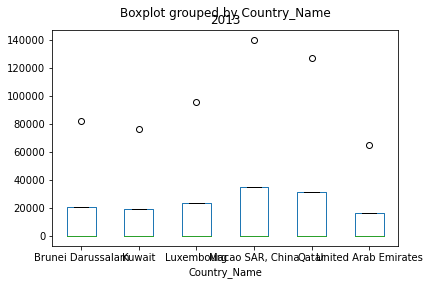

In [282]:

New_data_Expenditures.boxplot(by ='Country_Name', column =['2013'], grid = False)

array([[<AxesSubplot:title={'center':'2000'}>,
        <AxesSubplot:title={'center':'2001'}>,
        <AxesSubplot:title={'center':'2002'}>,
        <AxesSubplot:title={'center':'2003'}>],
       [<AxesSubplot:title={'center':'2004'}>,
        <AxesSubplot:title={'center':'2005'}>,
        <AxesSubplot:title={'center':'2006'}>,
        <AxesSubplot:title={'center':'2007'}>],
       [<AxesSubplot:title={'center':'2008'}>,
        <AxesSubplot:title={'center':'2009'}>,
        <AxesSubplot:title={'center':'2010'}>,
        <AxesSubplot:title={'center':'2011'}>],
       [<AxesSubplot:title={'center':'2012'}>,
        <AxesSubplot:title={'center':'2013'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

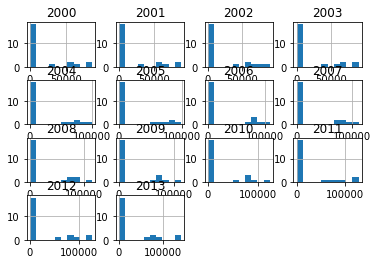

In [283]:
New_data_Expenditures.hist()

# Q2

- 	Population growth (annual %)(SP.POP.GROW)
